## Загрузка данных и реализация функционалов задания.

In [1]:
data(iris)
FEATURES <- iris[, c("Petal.Width", "Sepal.Width", "Petal.Length", "Sepal.Length")]

In [2]:
# Предобработка данных
transform <- function(data, method){
    if (method=='normalization' | method=='standartization'){
        if(method=='standartization'){
            c = TRUE
            s = TRUE
            return (features <- scale(data, center=c, scale=s)) 
        }
        return (features <- scale(data)) 
    }
    if (method=='poly2' | method=='poly3' | method=='poly23'){
        augmented_features <- data
        if (method=='poly2' | method=='poly23'){
            poly2_features <- poly(data.matrix(data), degree = 2)
            augmented_features <- cbind(data, poly2_features)
        }
        if (method=='poly3'| method=='poly23'){
            poly3_features <- poly(data.matrix(data), degree = 3)
            augmented_features <- cbind(augmented_features, poly3_features)
        }
        return (augmented_features)
    }
}

# Кластеризация данных
clusterization <- function(data, alg){
    if(alg=='kmeans'){
        print('Алгоритм K-средних')
        kmeans_result <- kmeans(data, centers = 3, nstart = 20)
        print(table(iris$Species, kmeans_result$cluster))
        kmeans_error <- sum(kmeans_result$cluster != as.numeric(iris$Species))
        cat("Ошибка предсказания для иерархической кластеризации:", kmeans_error, "\n")
        return(kmeans_result$cluster)
    }
    else if(alg=='hierarch'){
        print('Иерархическая кластеризация')
        hierarchical_result <- hclust(dist(data), method = "complete")
        hierarchical_clusters <- cutree(hierarchical_result, k = 3)
        print(table(iris$Species, hierarchical_clusters))
        hierarchical_error <- sum(hierarchical_clusters != as.numeric(iris$Species))
        cat("Ошибка предсказания для иерархической кластеризации:", hierarchical_error, "\n")
        return(hierarchical_clusters)
    }
    else if(alg=='pam'){
        print('Кластеризация на основе строгого разбиения')
        library(cluster)
        pam_result <- pam(data, k = 3)
        pam_clusters <- pam_result$clustering
        print(table(iris$Species, pam_clusters))
        pam_error <- sum(pam_clusters != as.numeric(iris$Species))
        cat("Ошибка предсказания для кластеризации на основе строгого разбиения:", pam_error, "\n")
        return(pam_clusters)
    }
    else if(alg=='mclust'){
        if (!require("mclust")) install.packages("mclust")
        library(mclust)
        print('Параметрический вероятностный алгоритм (EM-алгоритм)')
        mclust_result <- Mclust(data, G = 3)
        mclust_clusters <- mclust_result$classification
        print(table(iris$Species, mclust_clusters))
        mclust_error <- sum(mclust_clusters != as.numeric(iris$Species))
        cat("Ошибка предсказания для параметрической вероятностной кластеризации:", mclust_error, "\n")
        return(mclust_clusters)
    }
}

In [3]:
plots_pairs <- function(clusters, alg_name='(какой кластеризации?)'){
    library(ggplot2)
    
    # Создаем список переменных
    variables <- c("Petal.Width", "Sepal.Width", "Petal.Length", "Sepal.Length")
    
    # Вложенный цикл для перебора всех комбинаций переменных
    for (i in 1:(length(variables)-1)) {
      for (j in (i+1):length(variables)) {
        x_var <- variables[i]
        y_var <- variables[j]

        # Выполняем кластеризацию методом k-средних
        clusters <- as.factor(clusters)
        levels(clusters) <- levels(iris$Species)

        # Создаем дополнительную переменную, указывающую на правильность предсказаний
        iris$correct_cluster <- iris$Species == clusters

        # Строим график с использованием ggplot2
        plot_title <- paste("График данных IRIS на основе ", alg_name,
                            " (", x_var, " vs ", y_var, ")", sep="")
        print(ggplot(iris, aes_string(x=x_var, y=y_var, color="clusters", shape="correct_cluster")) +
                geom_point(size=3.5,
                           fill=NA) +
                scale_color_manual(values = c("setosa" = "#FF9999", 
                                              "versicolor" = "#99FF99", 
                                              "virginica"="#9999FF"), 
                                   name = "Species",
                                   labels = c("setosa", "versicolor", "virginica")) +
                labs(title = plot_title,
                     x = x_var,
                     y = y_var, 
                     shape = "Предсказания") +
                theme_minimal())
      }
    }
    
}
# Регулирование размеров картинки
options(repr.plot.width=10, repr.plot.height=10)


## Анализ данных

In [4]:
new_features<-transform(FEATURES, method='normalization')
#new_features<-transform(new_features, method='poly23')

clust_k <- clusterization(new_features,'kmeans')
clust_h <- clusterization(new_features,'hierarch')
clust_p <- clusterization(new_features,'pam')
clust_m <- clusterization(new_features,'mclust')

[1] "Алгоритм K-средних"
            
              1  2  3
  setosa      0  0 50
  versicolor 11 39  0
  virginica  36 14  0
Ошибка предсказания для иерархической кластеризации: 111 
[1] "Иерархическая кластеризация"
            hierarchical_clusters
              1  2  3
  setosa     49  1  0
  versicolor  0 21 29
  virginica   0  2 48
Ошибка предсказания для иерархической кластеризации: 32 
[1] "Кластеризация на основе строгого разбиения"
            pam_clusters
              1  2  3
  setosa     50  0  0
  versicolor  0  9 41
  virginica   0 36 14
Ошибка предсказания для кластеризации на основе строгого разбиения: 77 


Loading required package: mclust

Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.



[1] "Параметрический вероятностный алгоритм (EM-алгоритм)"
            mclust_clusters
              1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50
Ошибка предсказания для параметрической вероятностной кластеризации: 5 


## Визуализация результатов

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


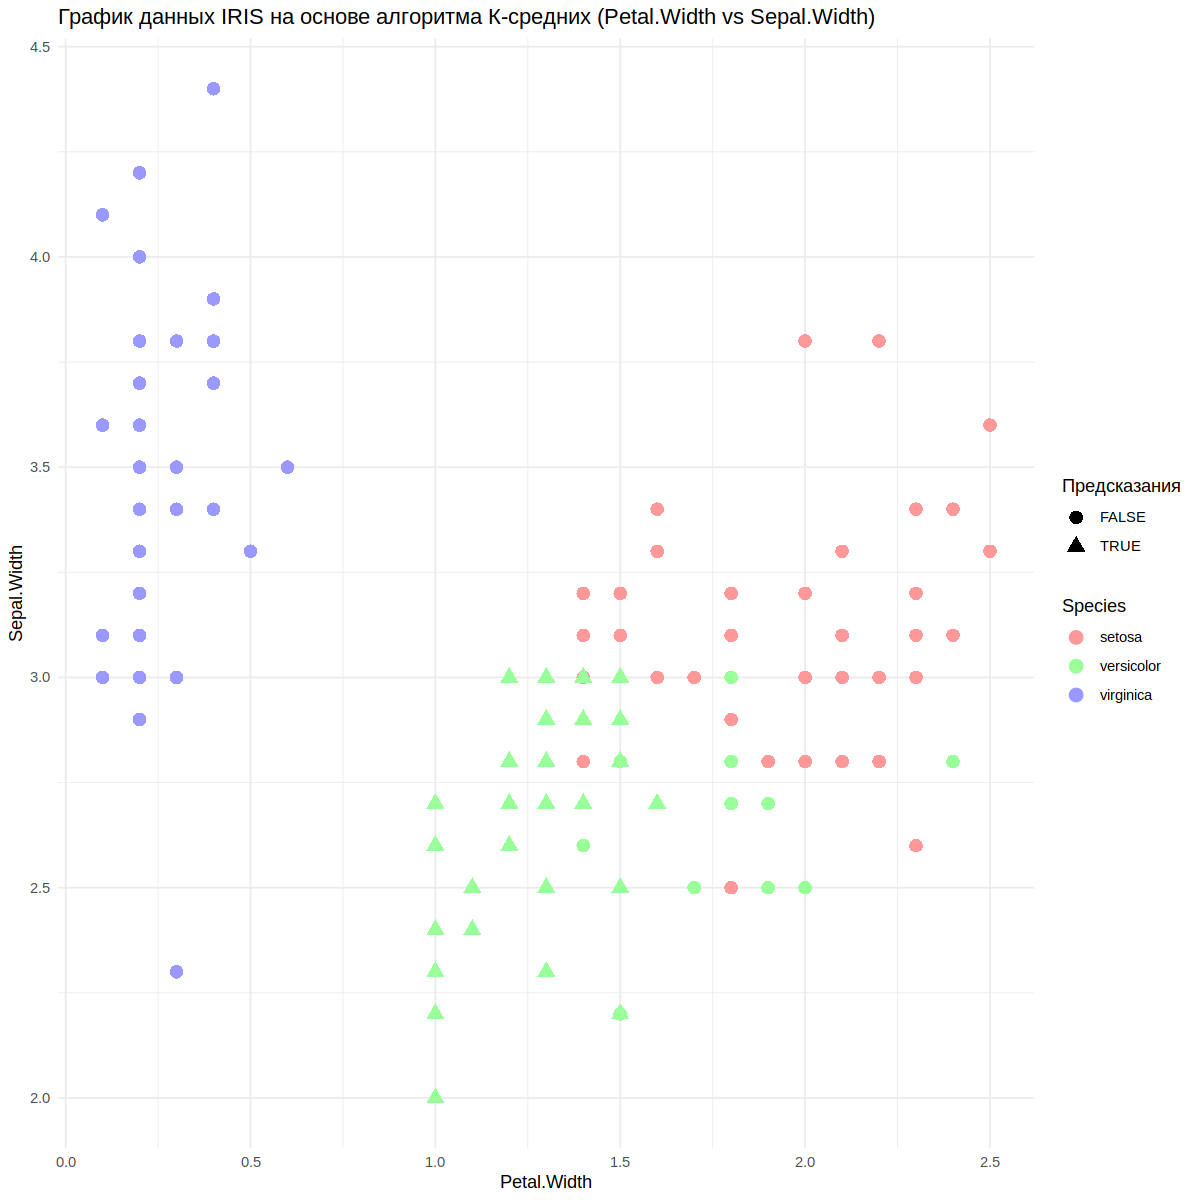

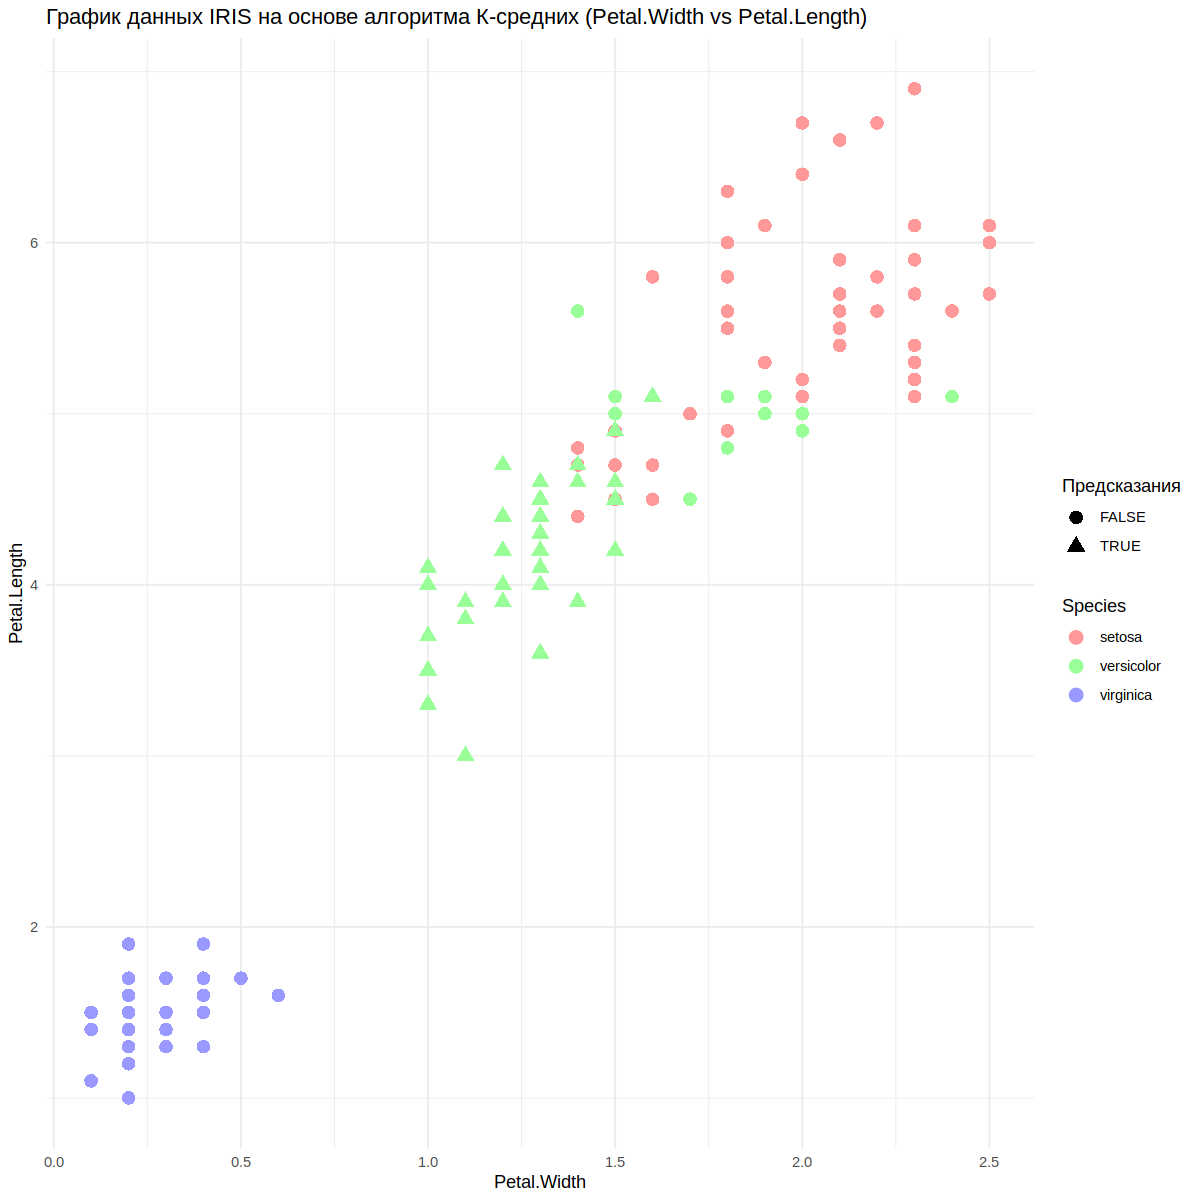

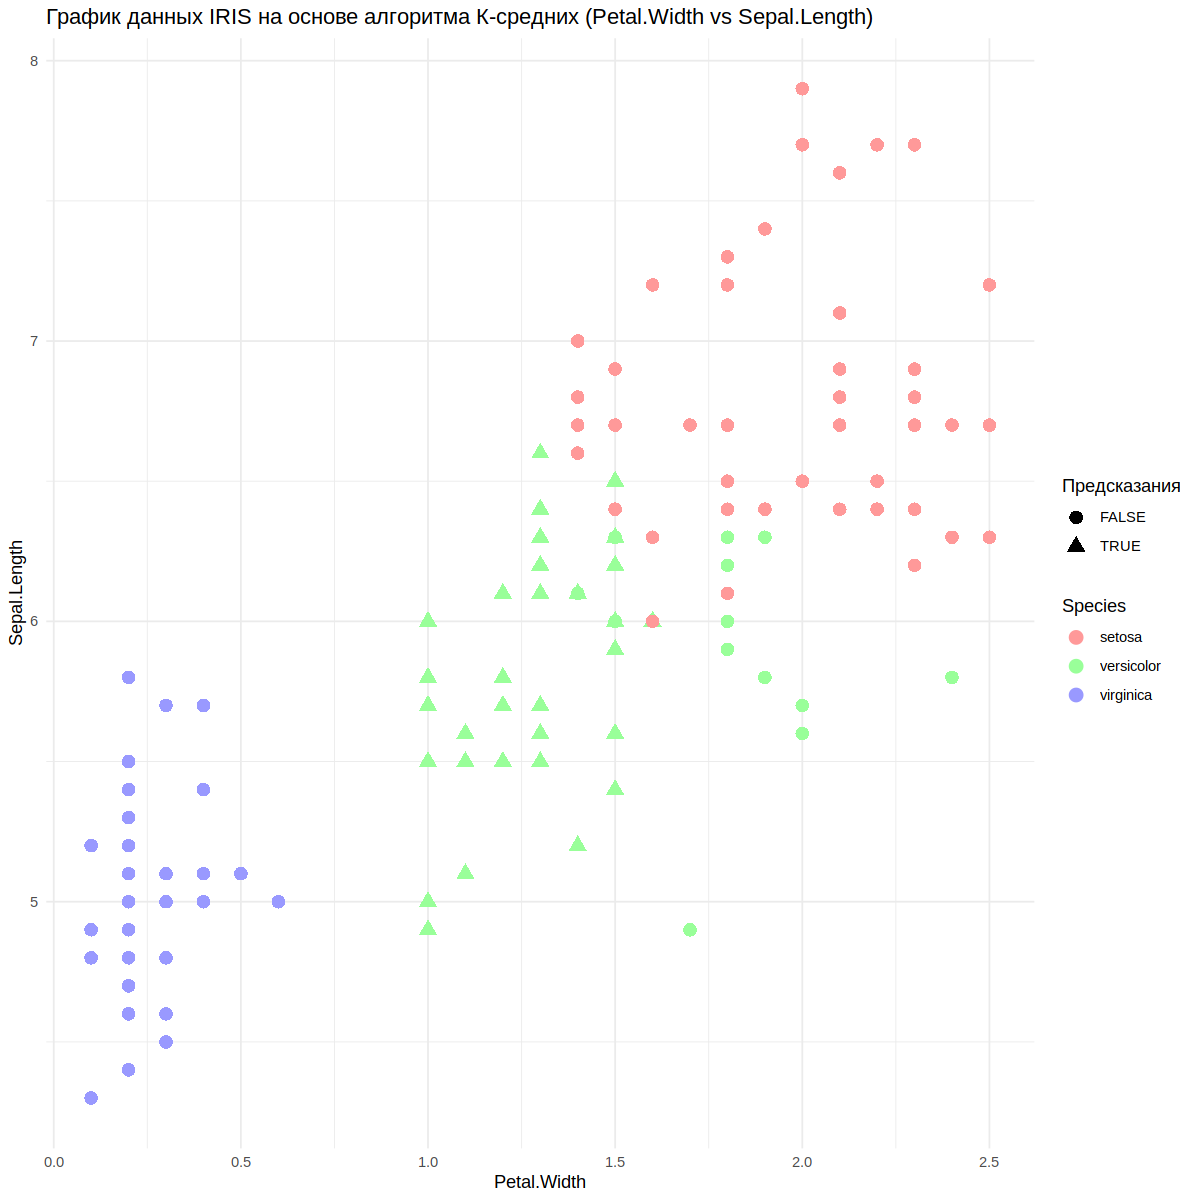

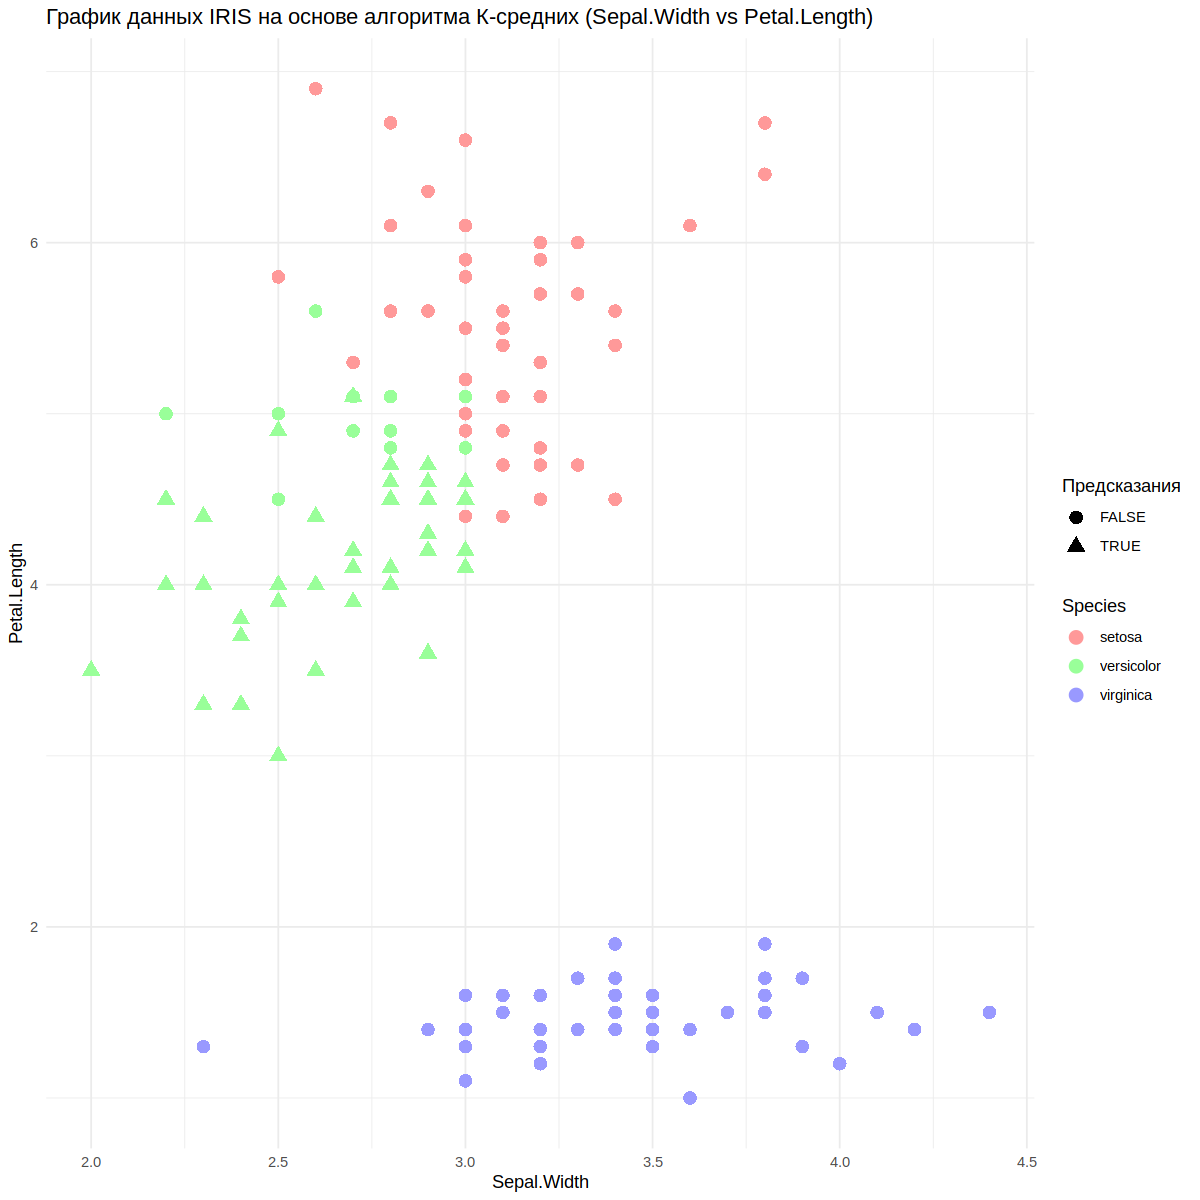

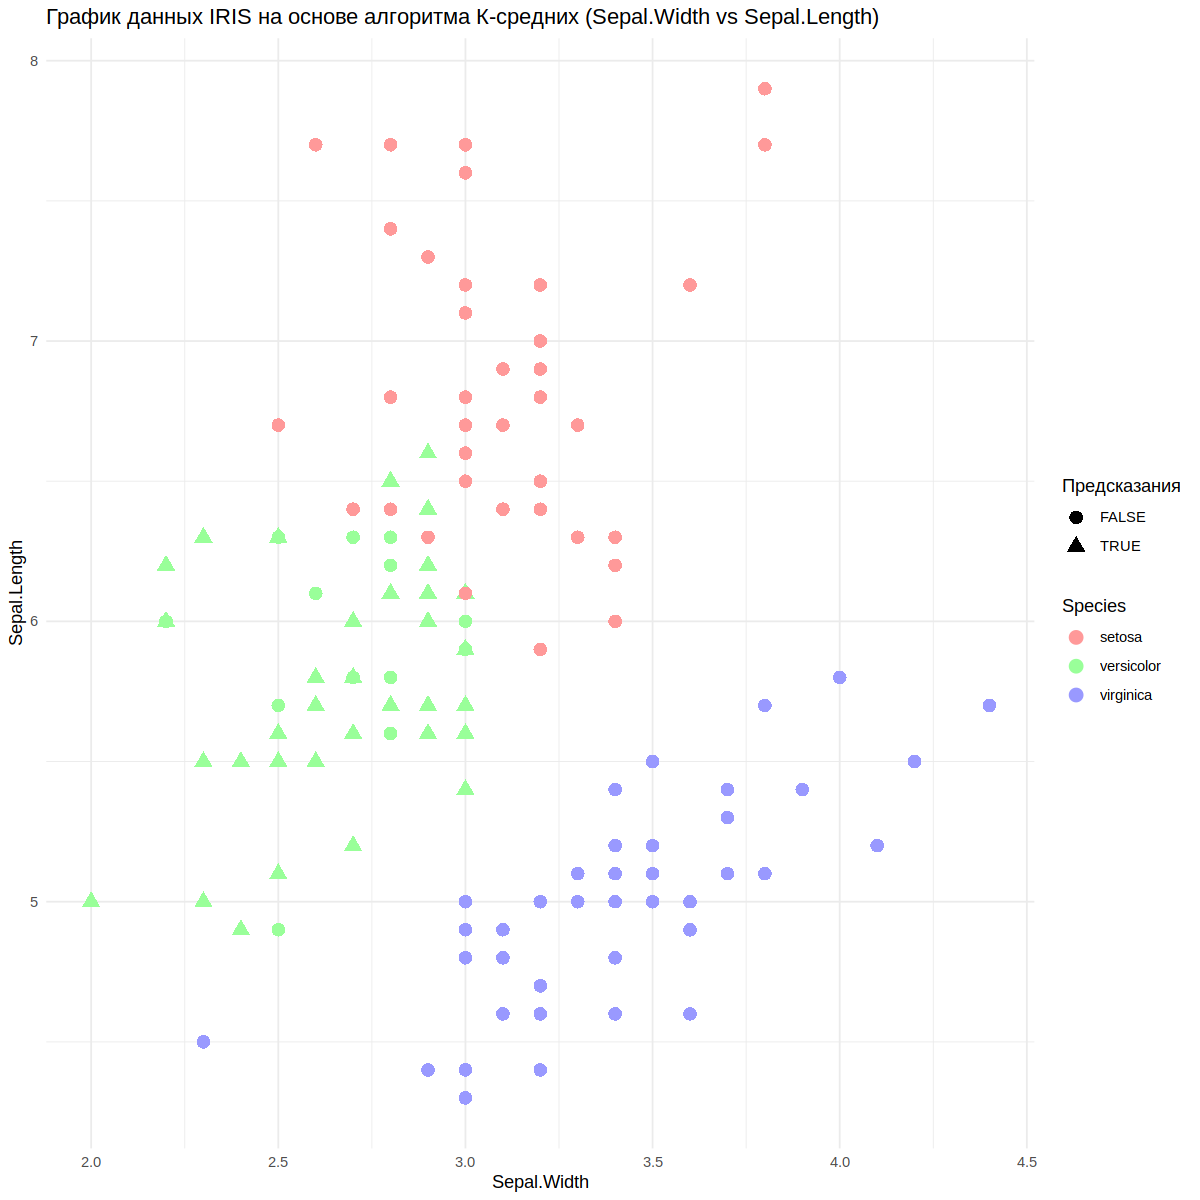

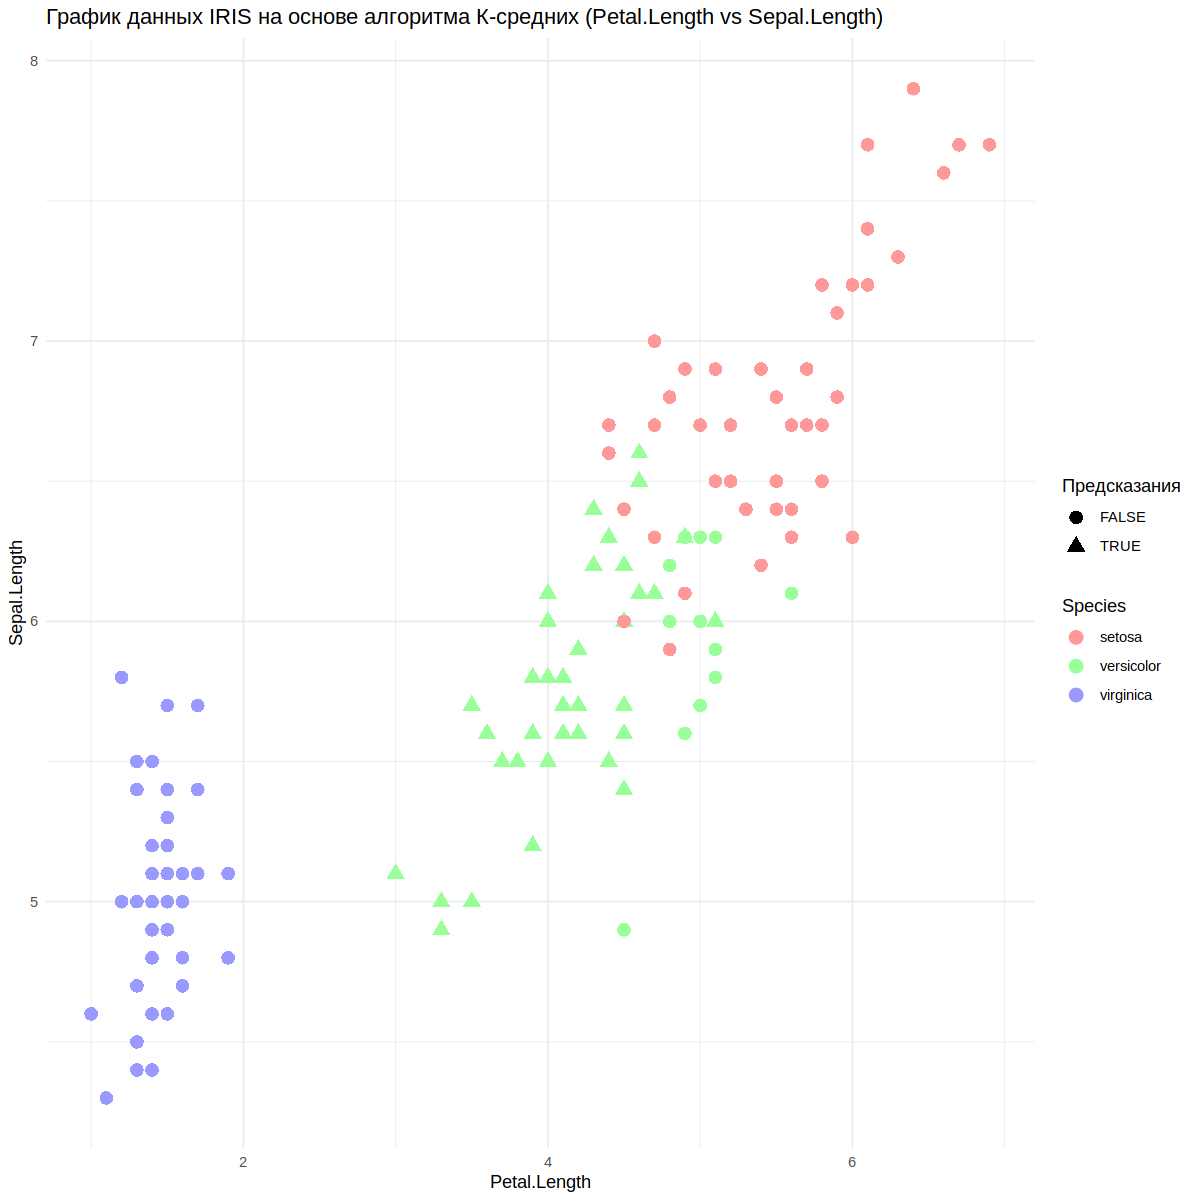

In [5]:
plots_pairs(clust_k, alg_name="алгоритма К-средних" )

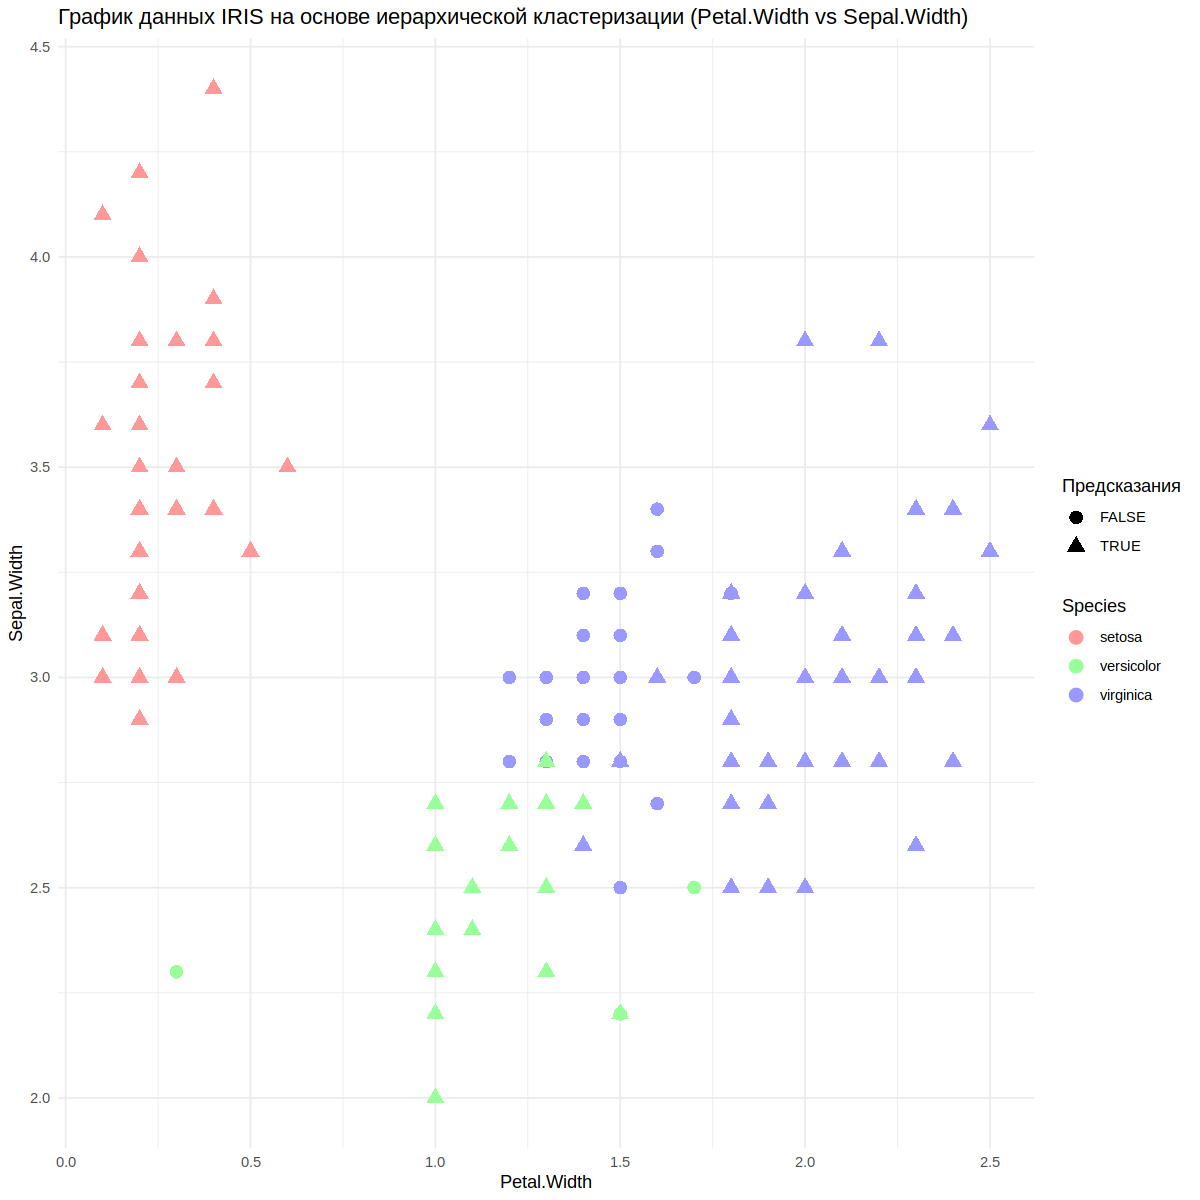

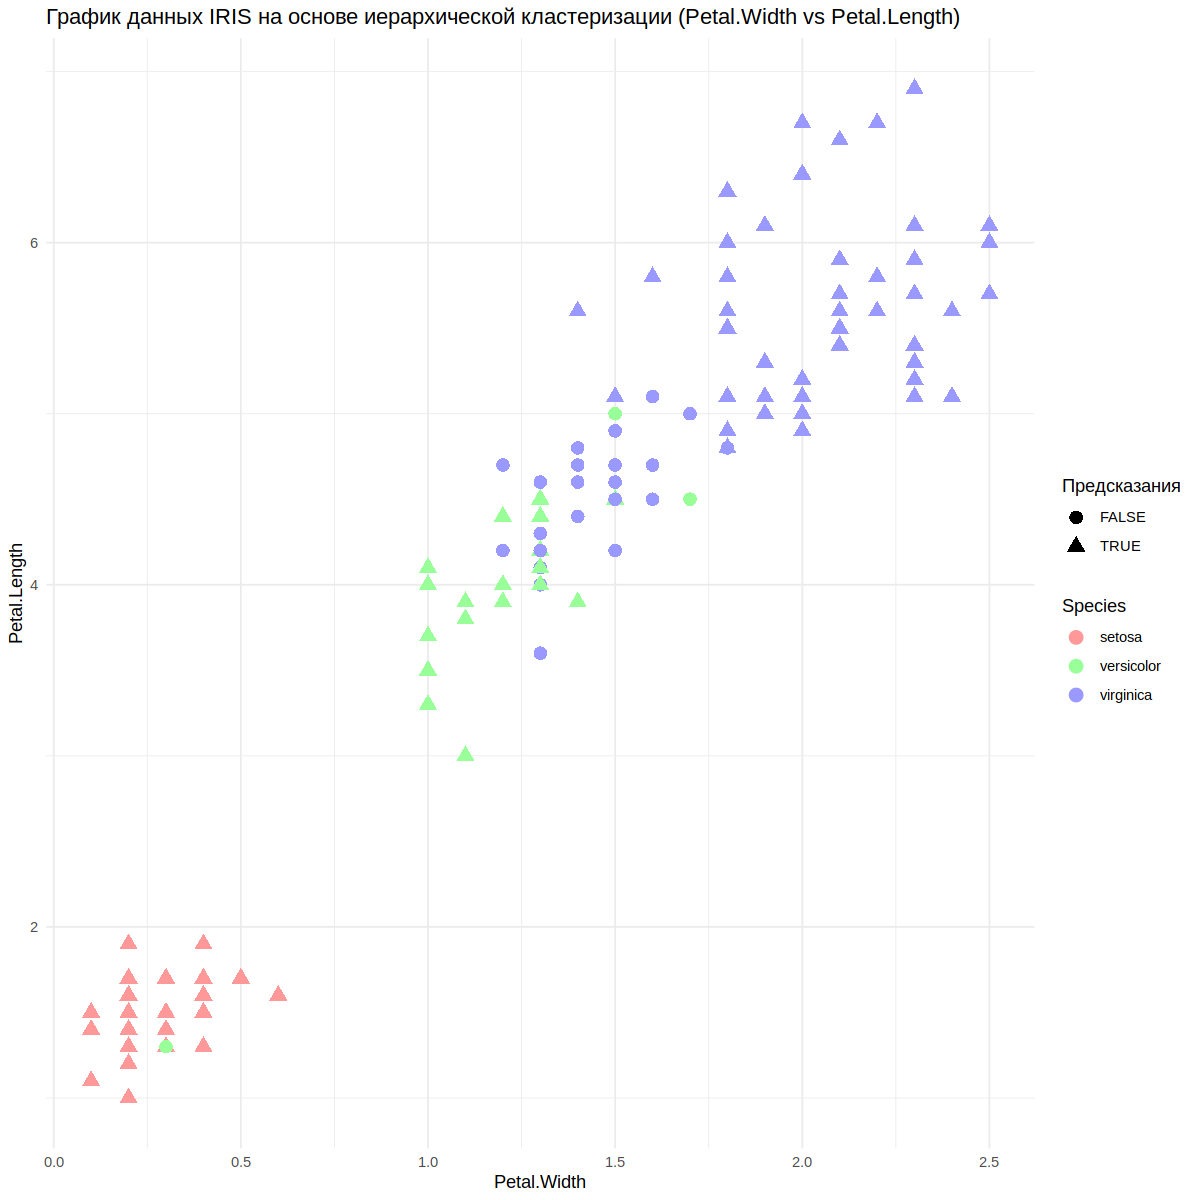

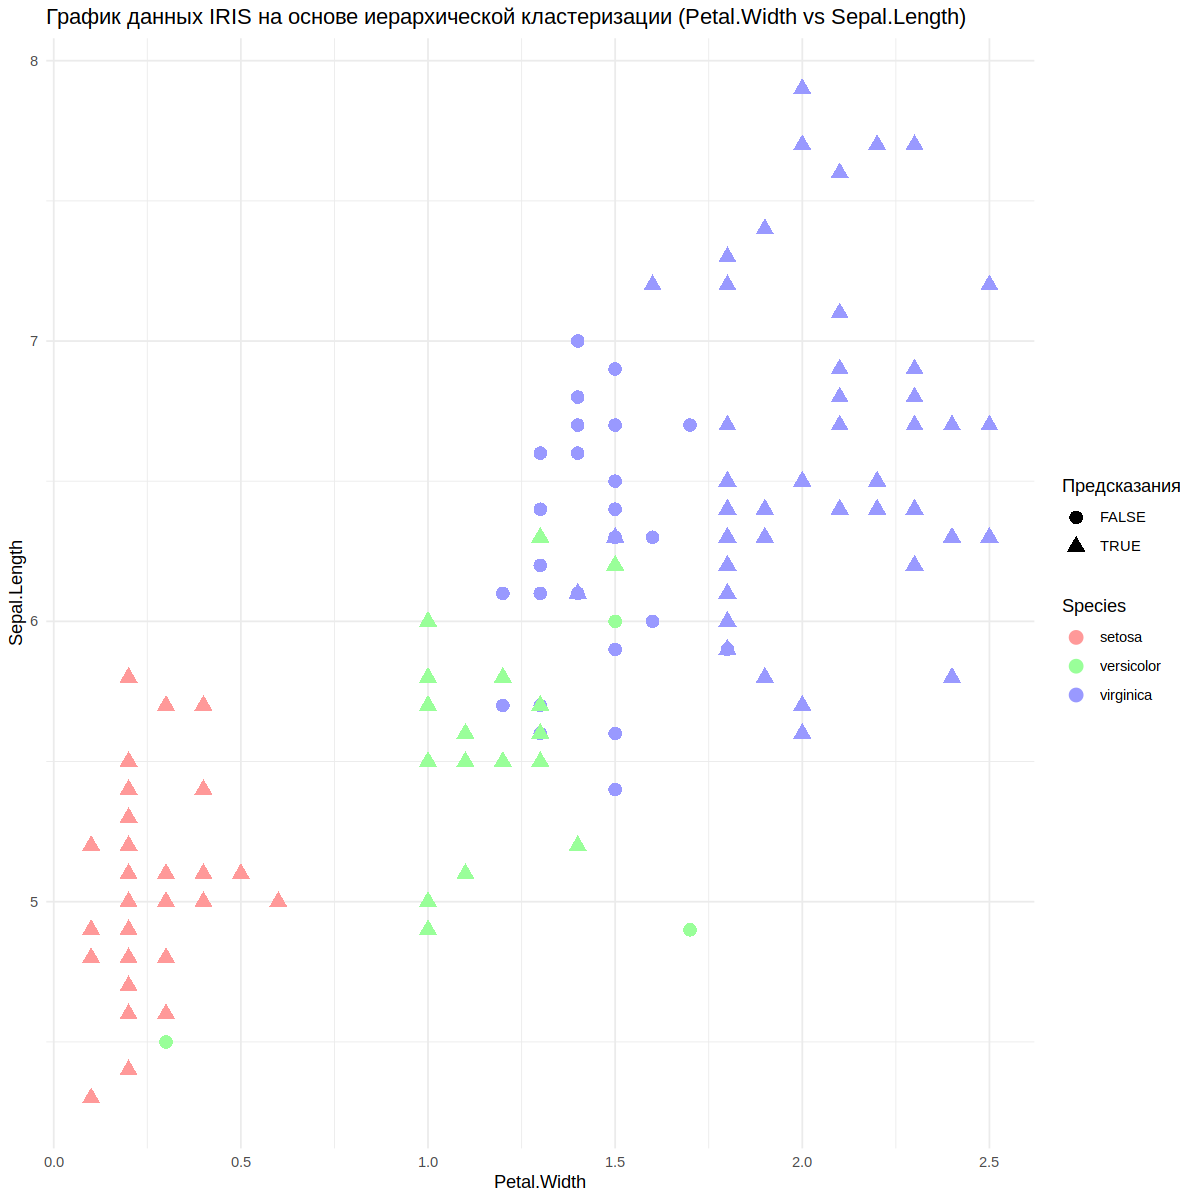

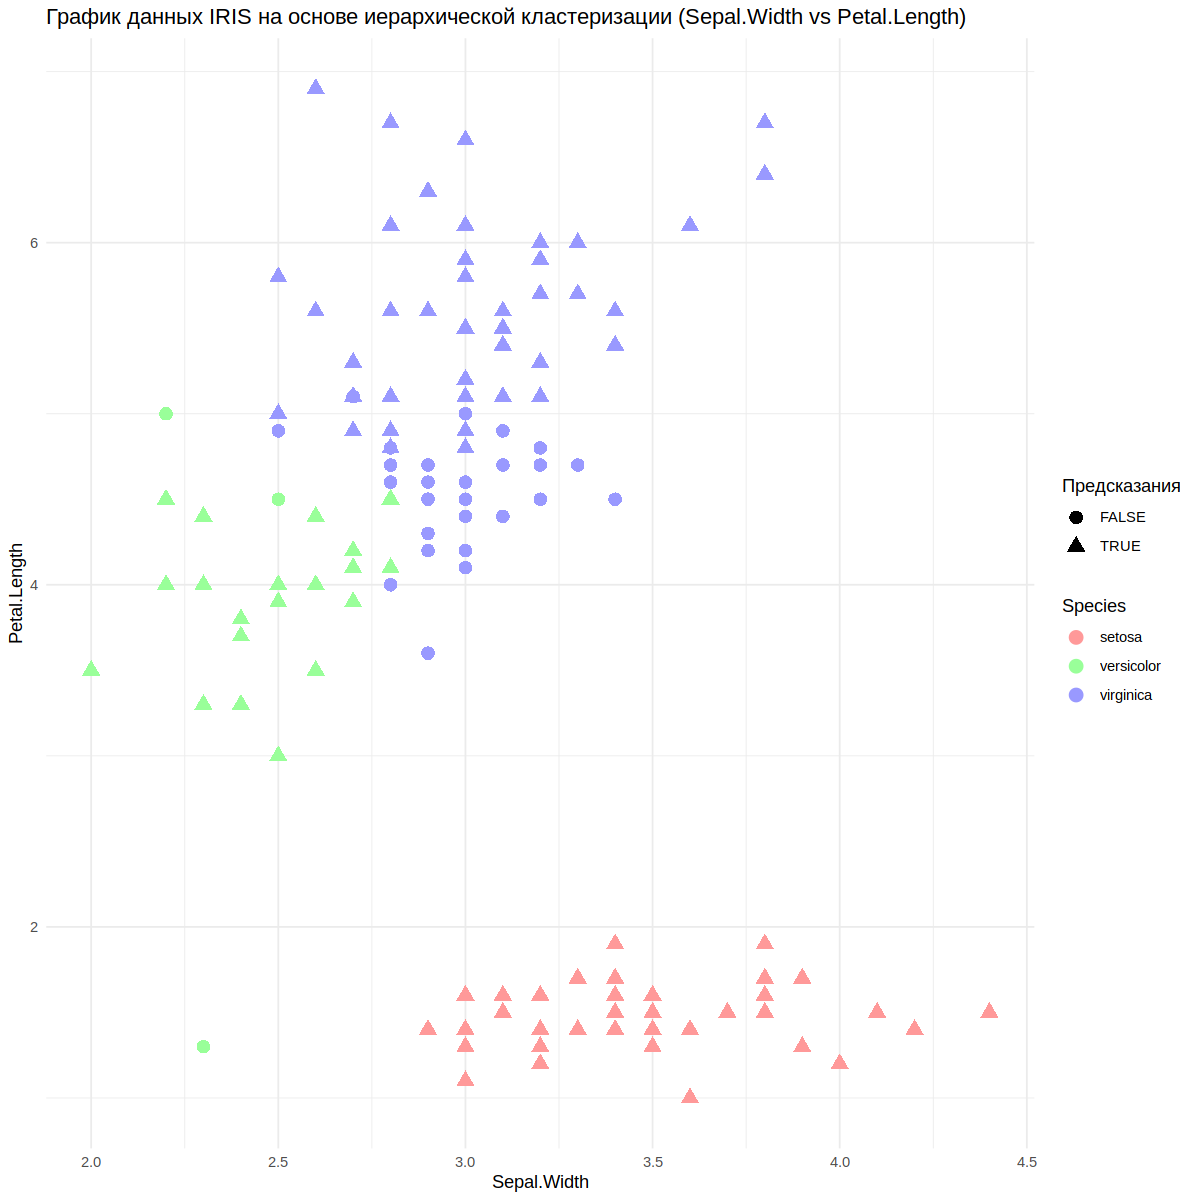

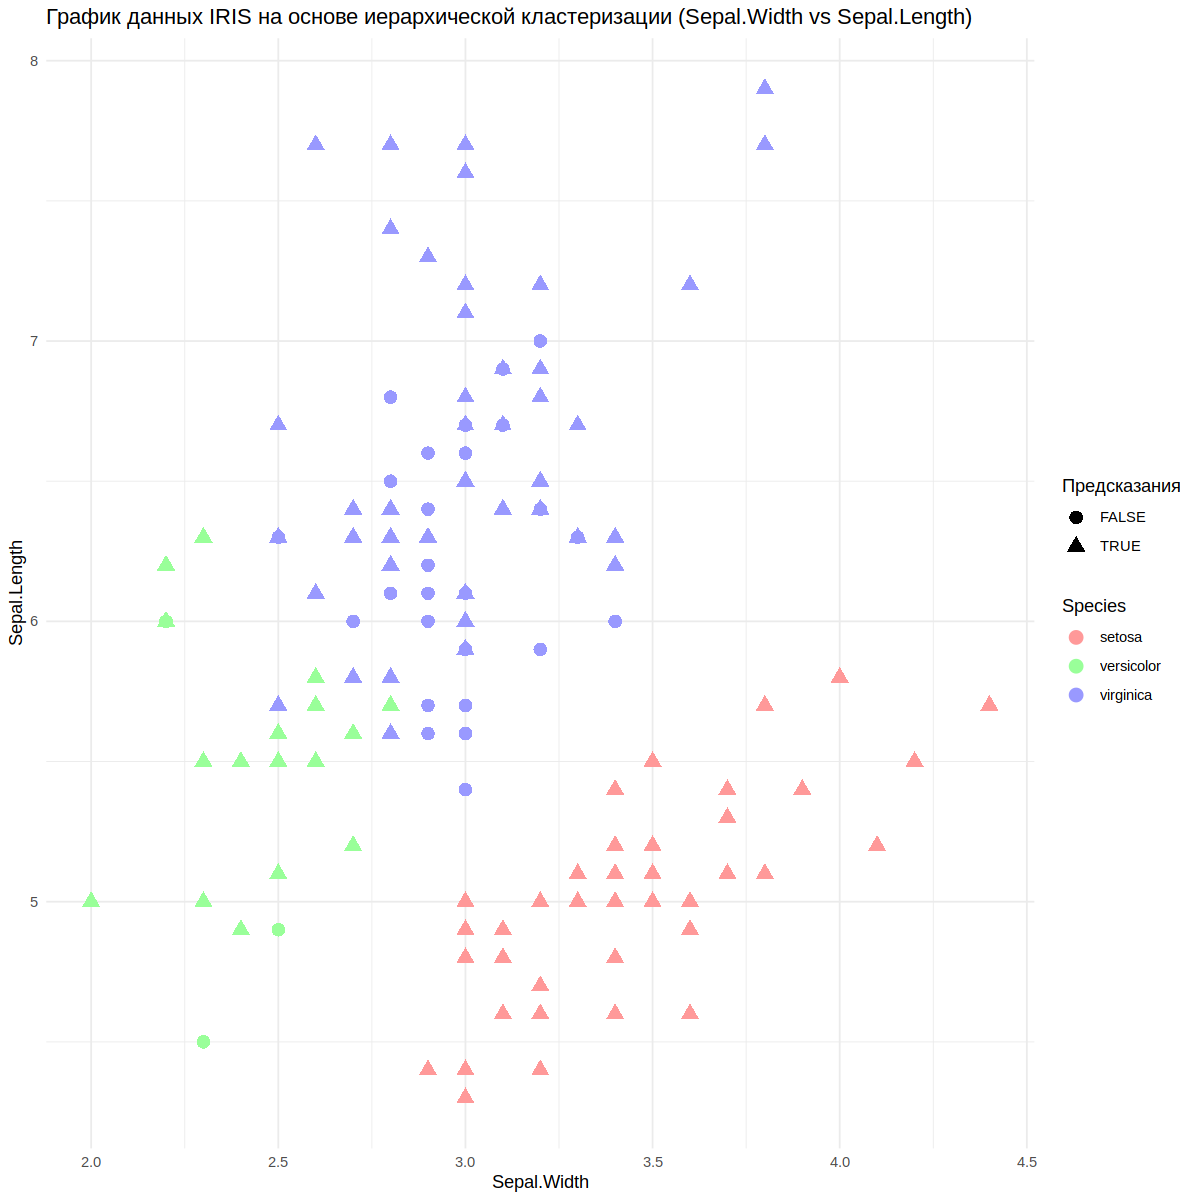

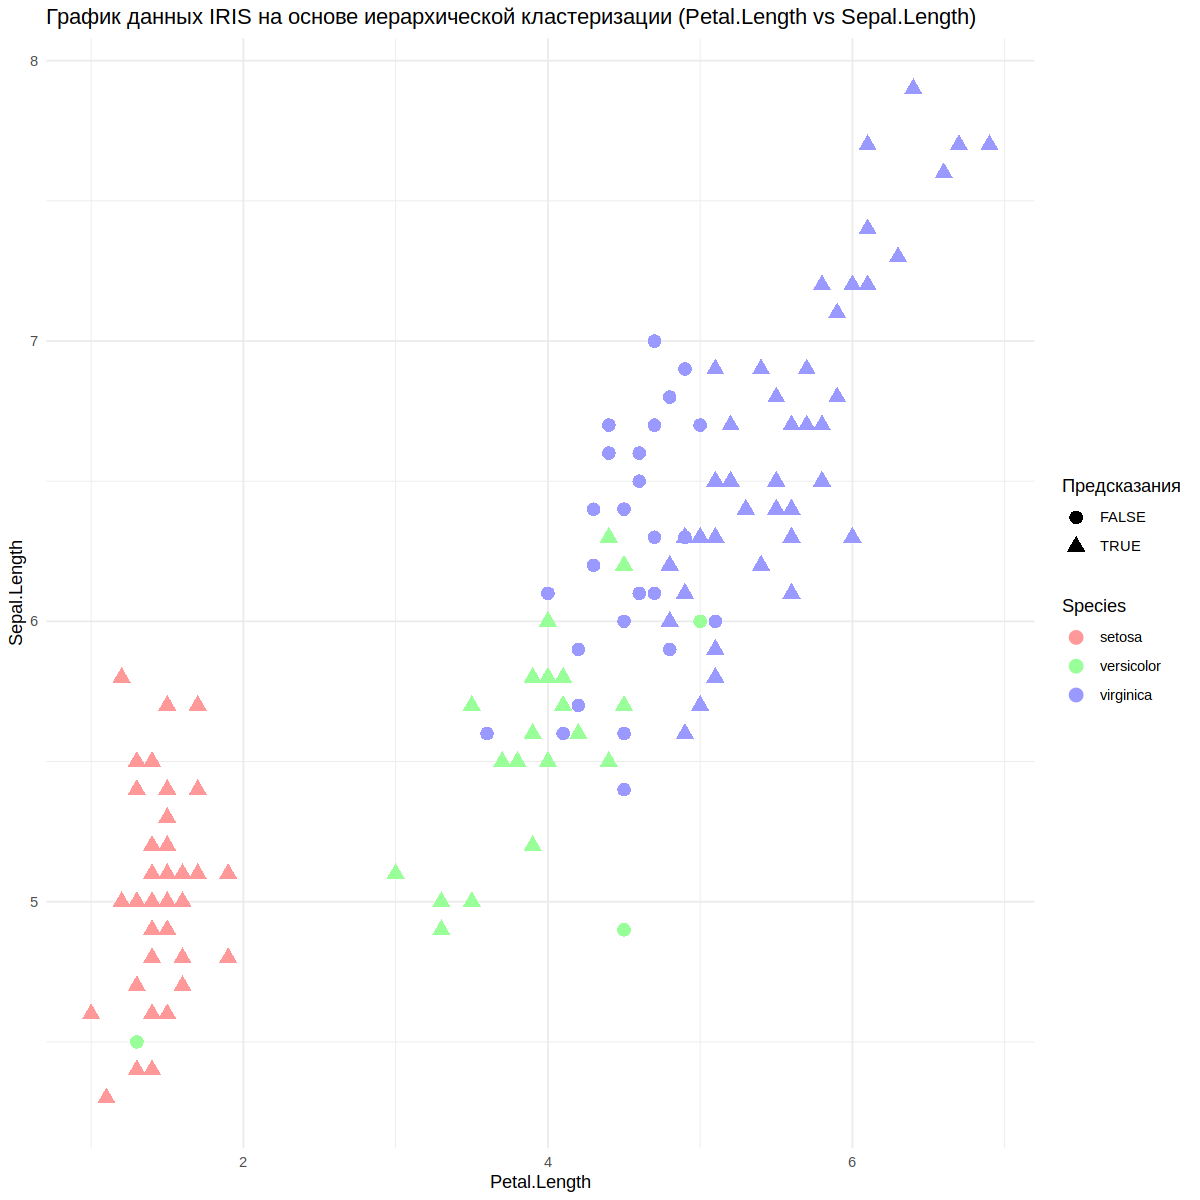

In [6]:
plots_pairs(clust_h, alg_name="иерархической кластеризации" )

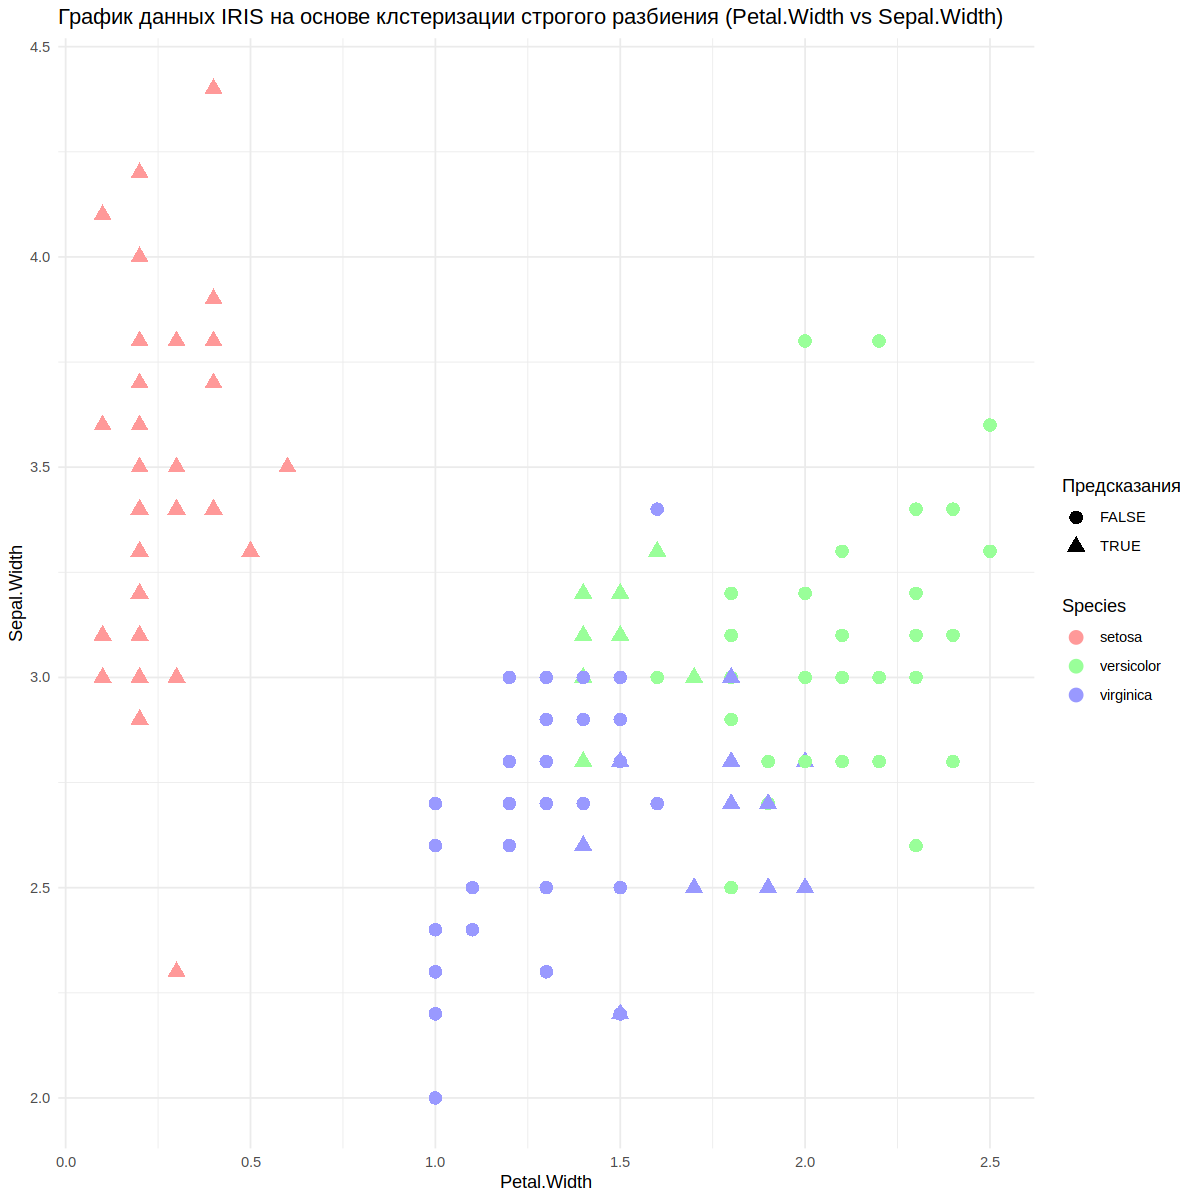

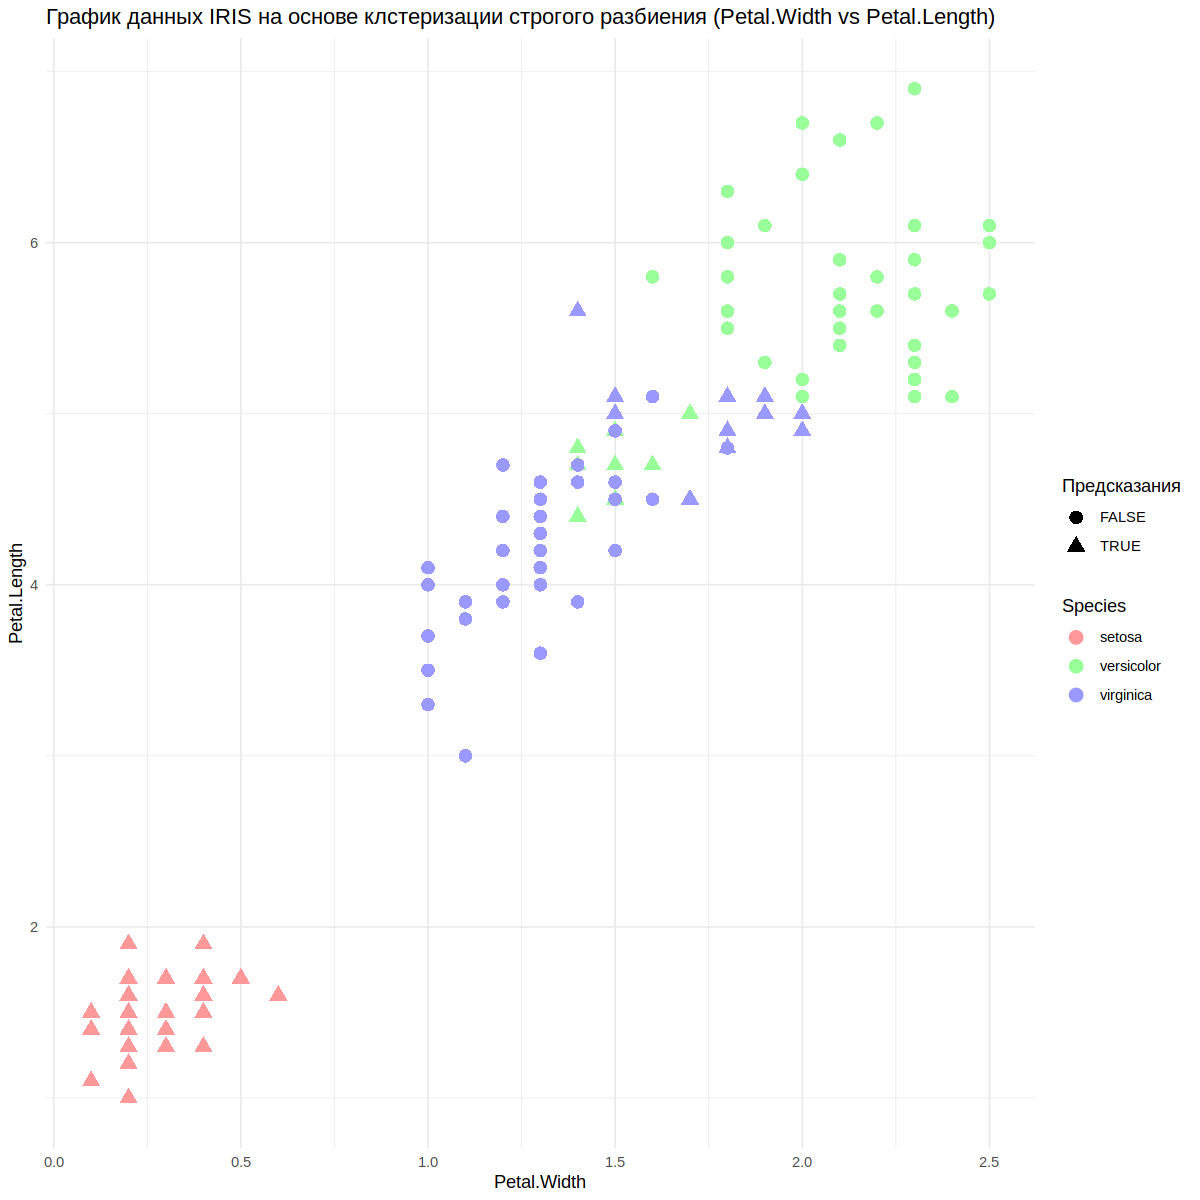

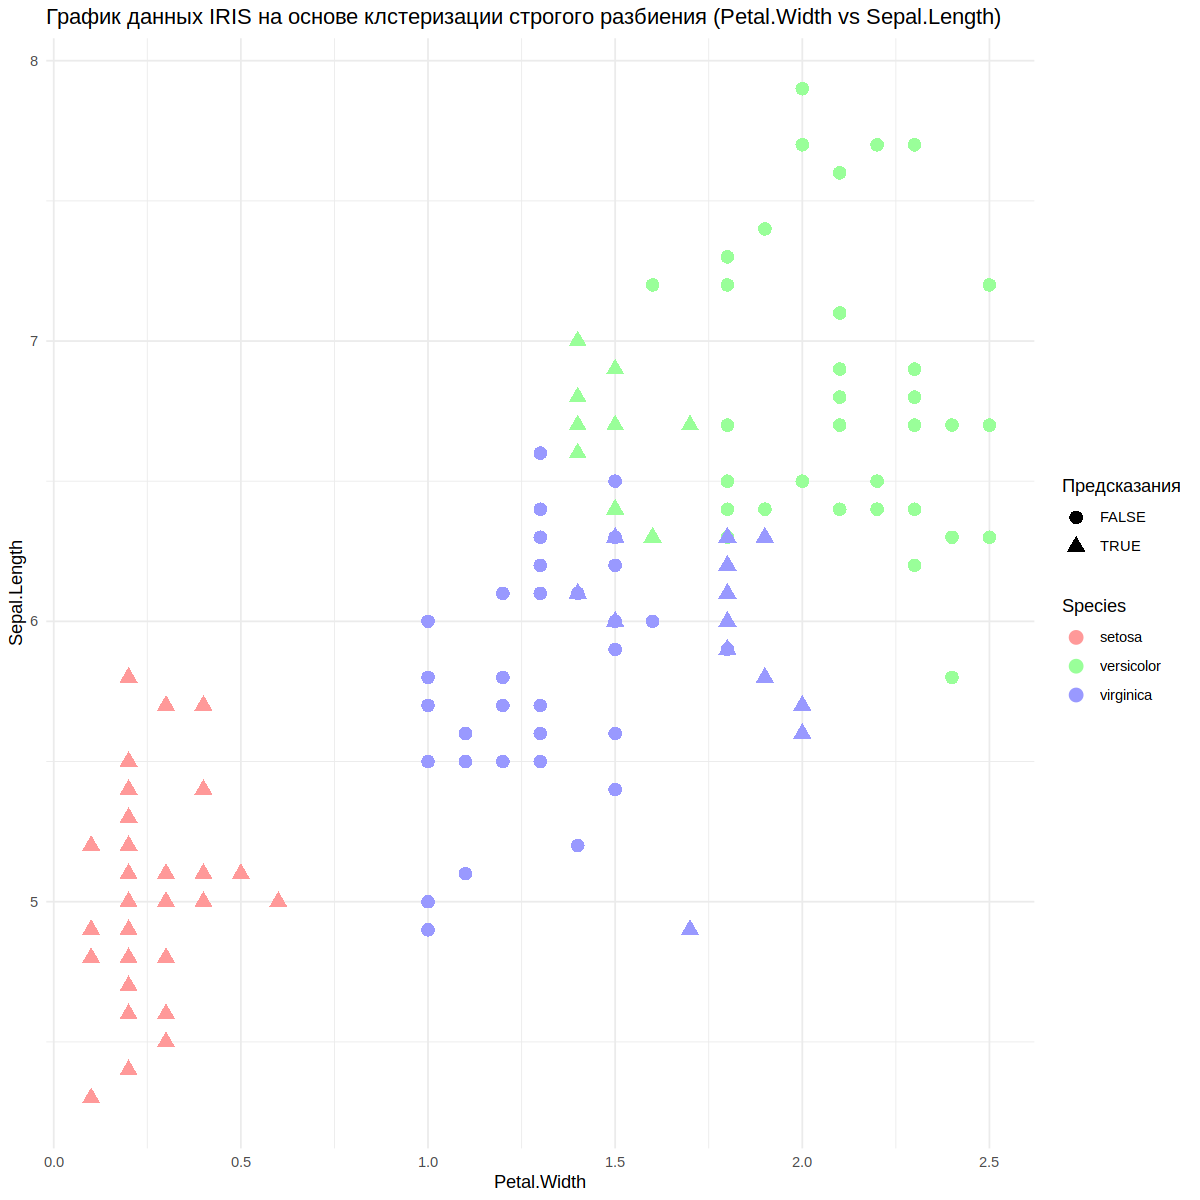

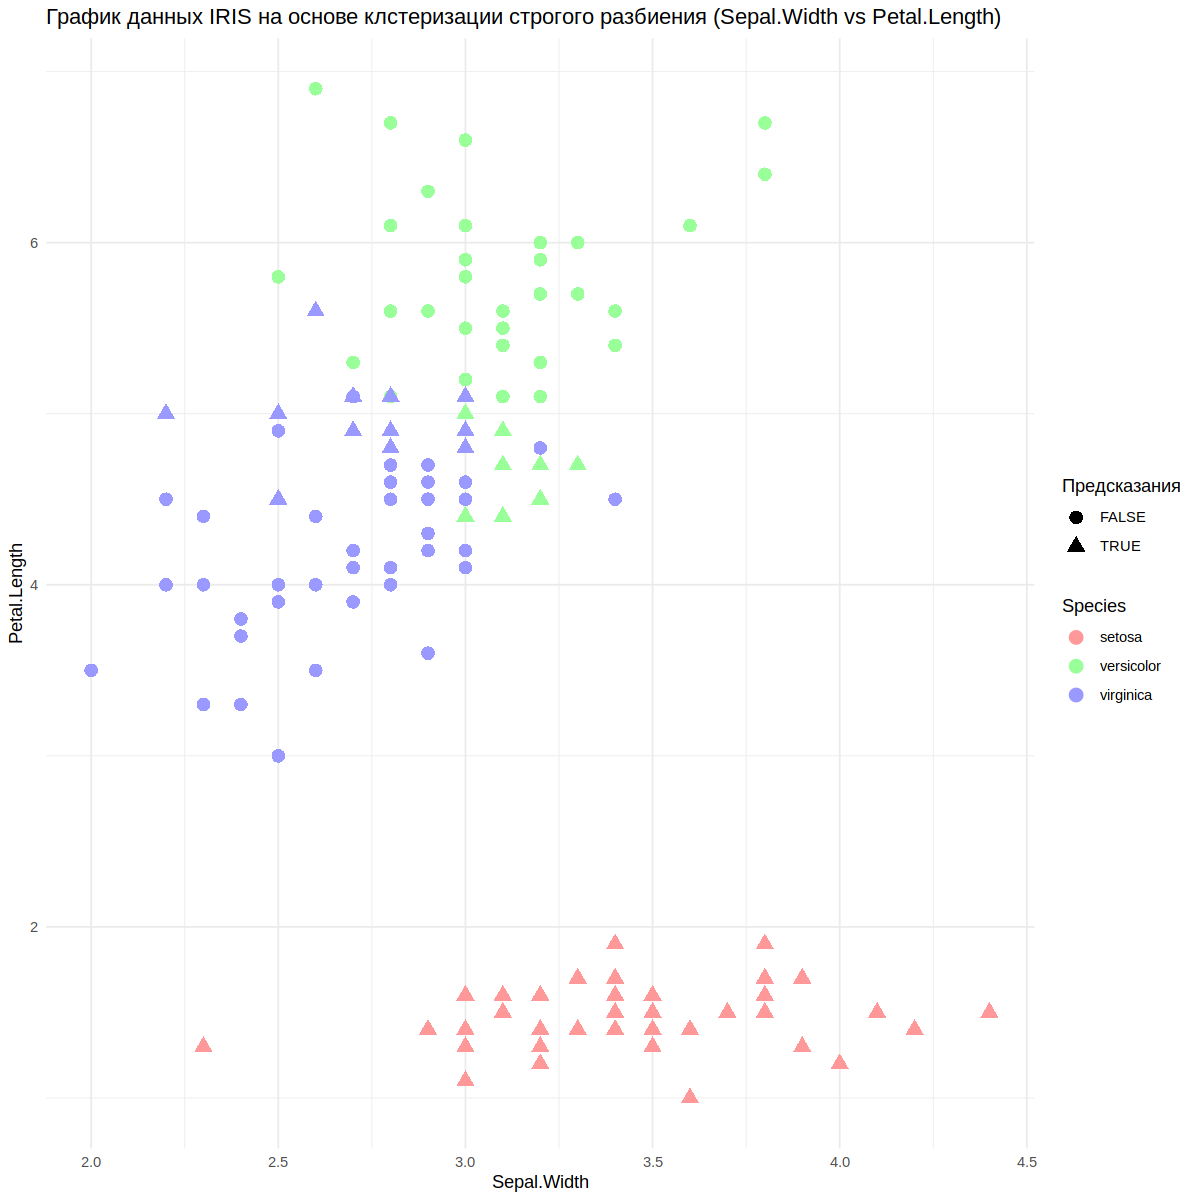

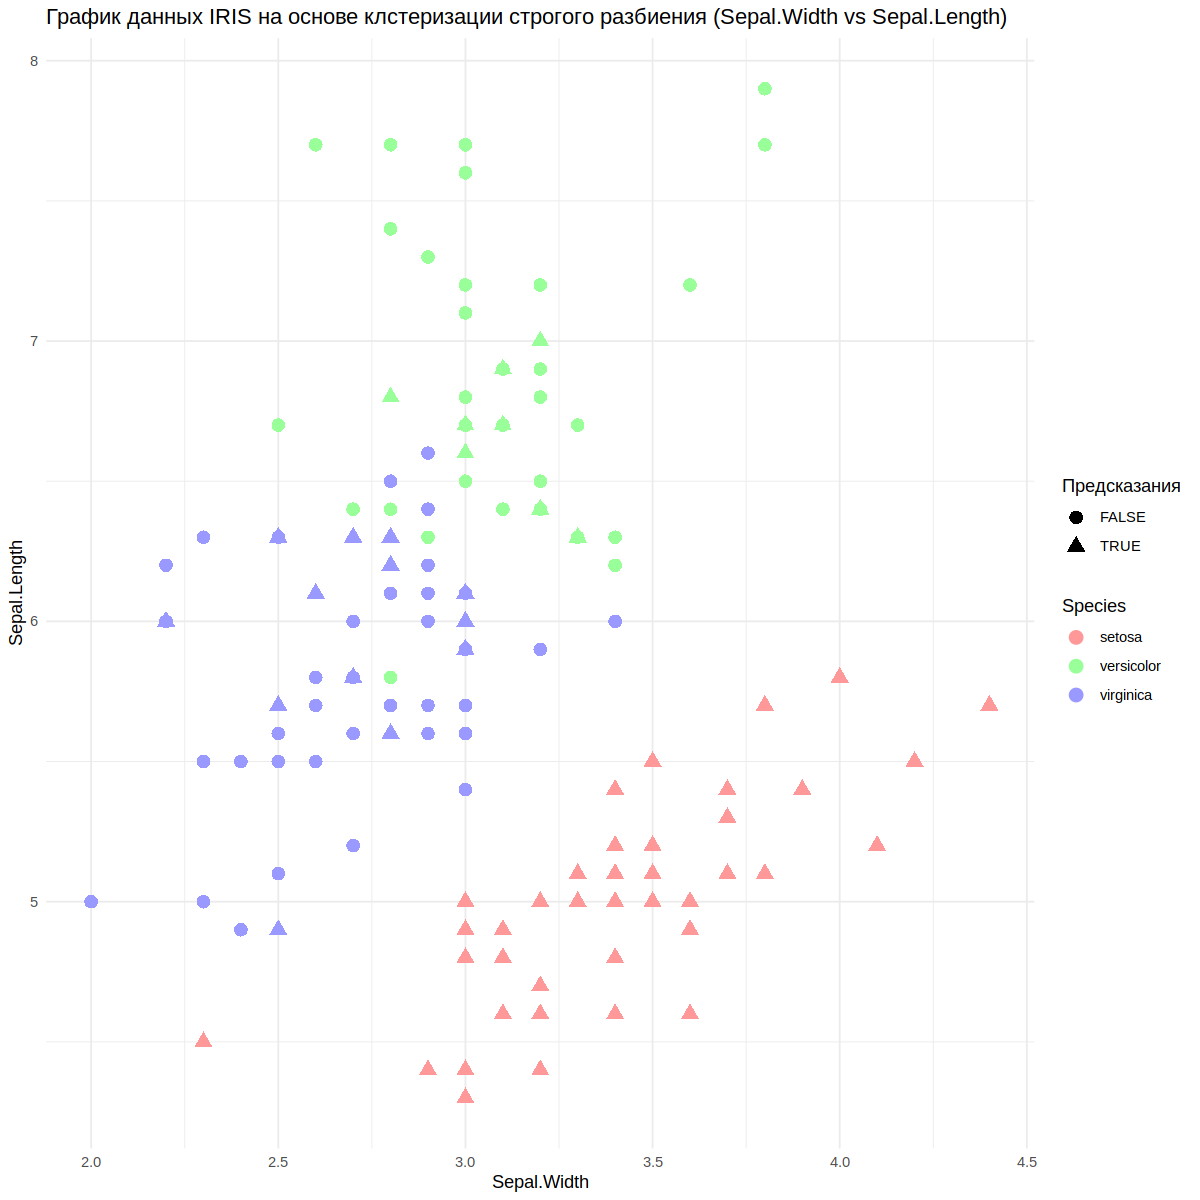

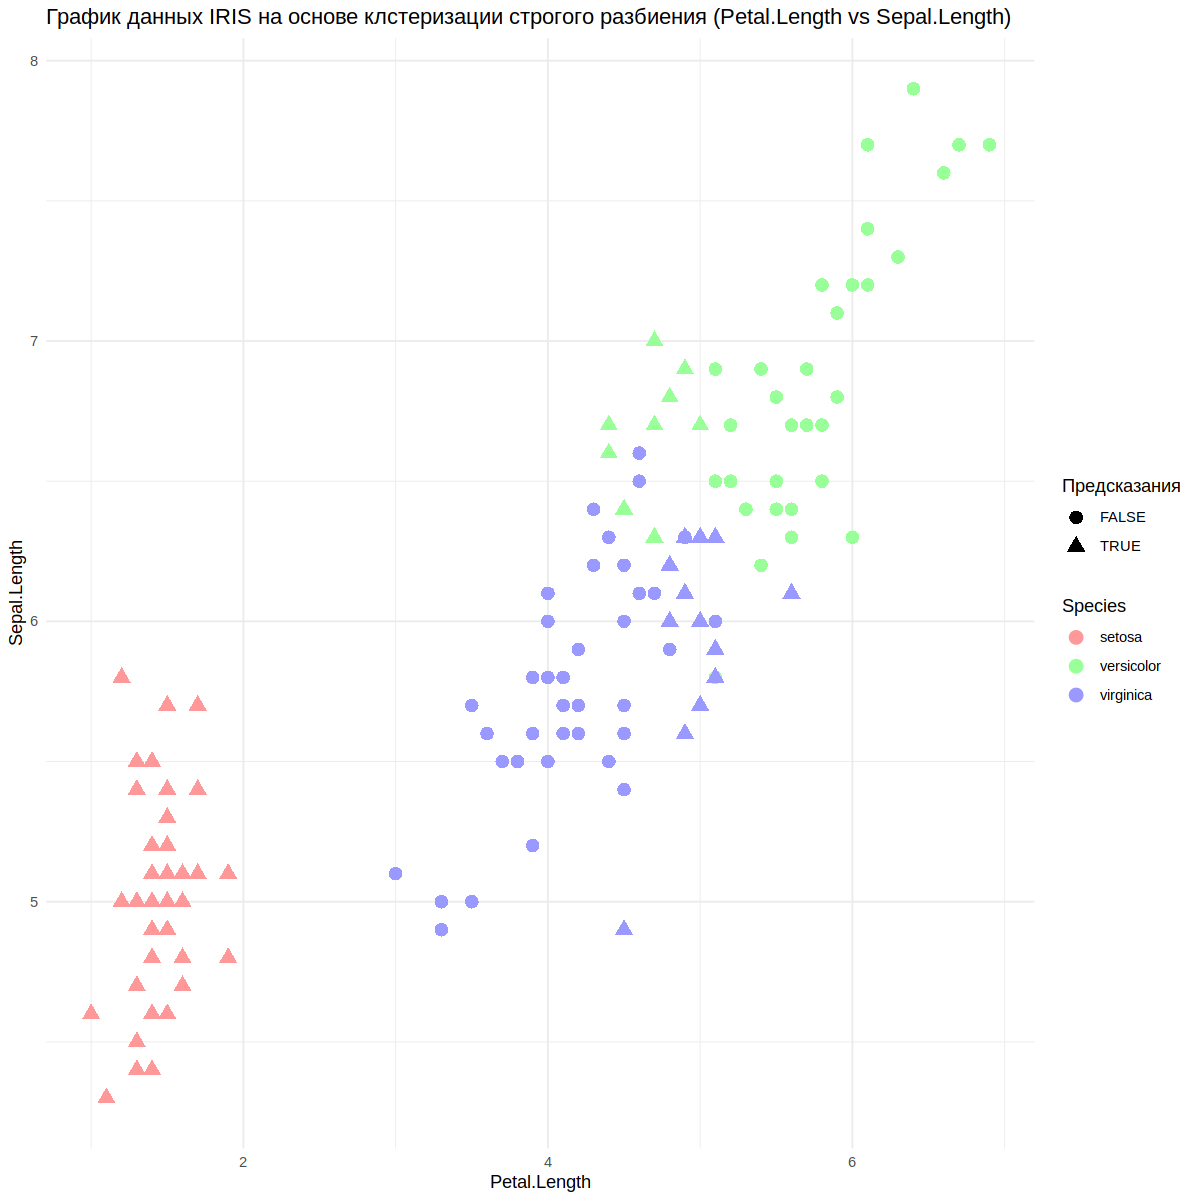

In [7]:
plots_pairs(clust_p, alg_name="клстеризации строгого разбиения" )

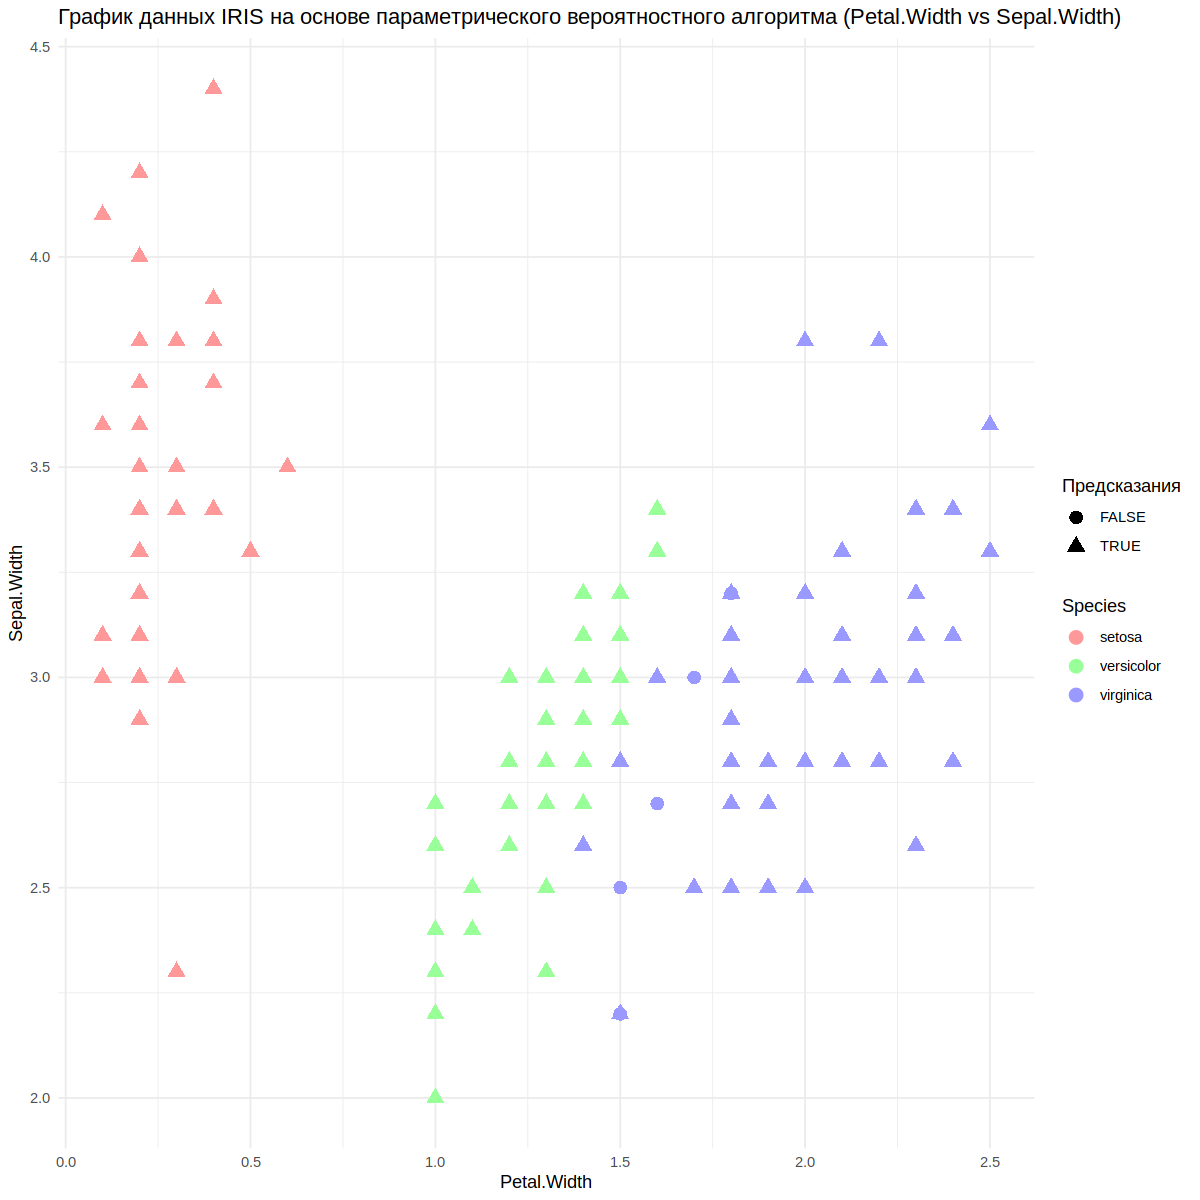

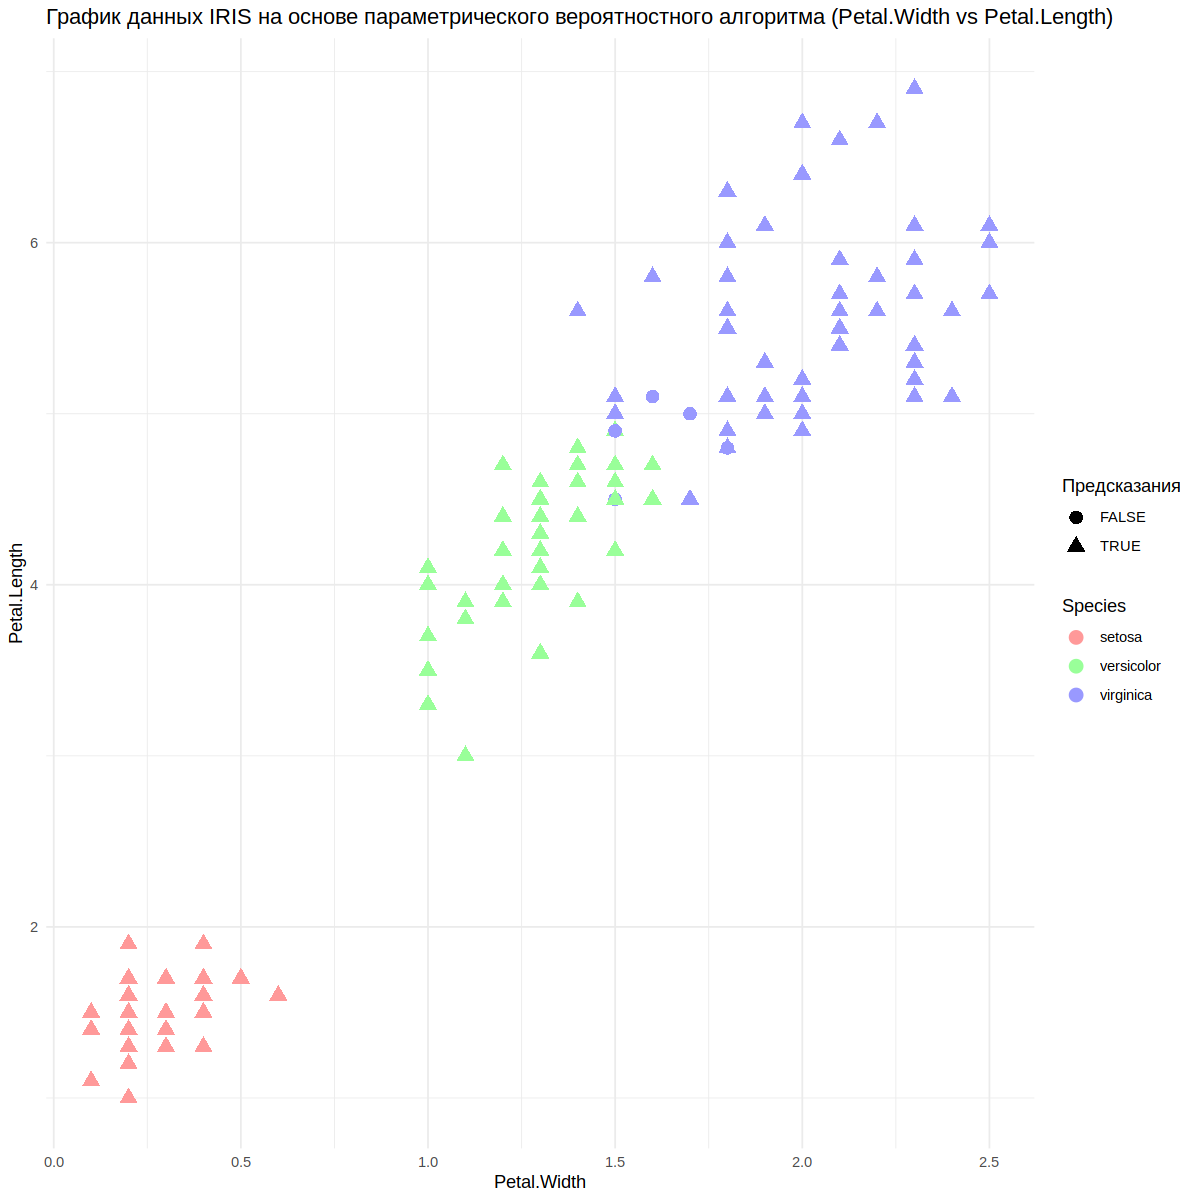

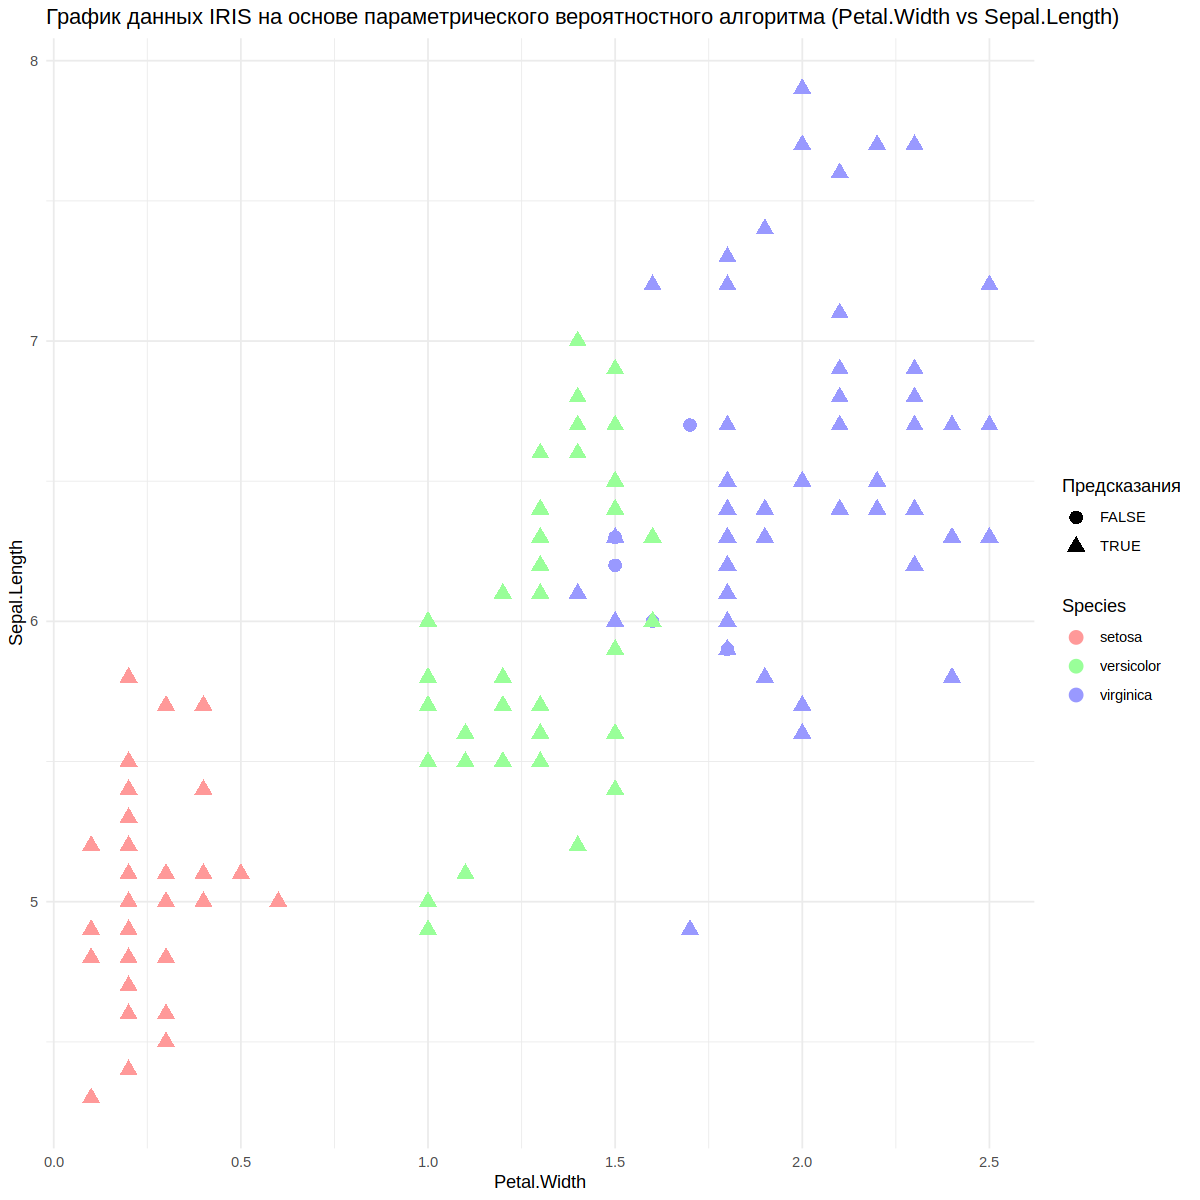

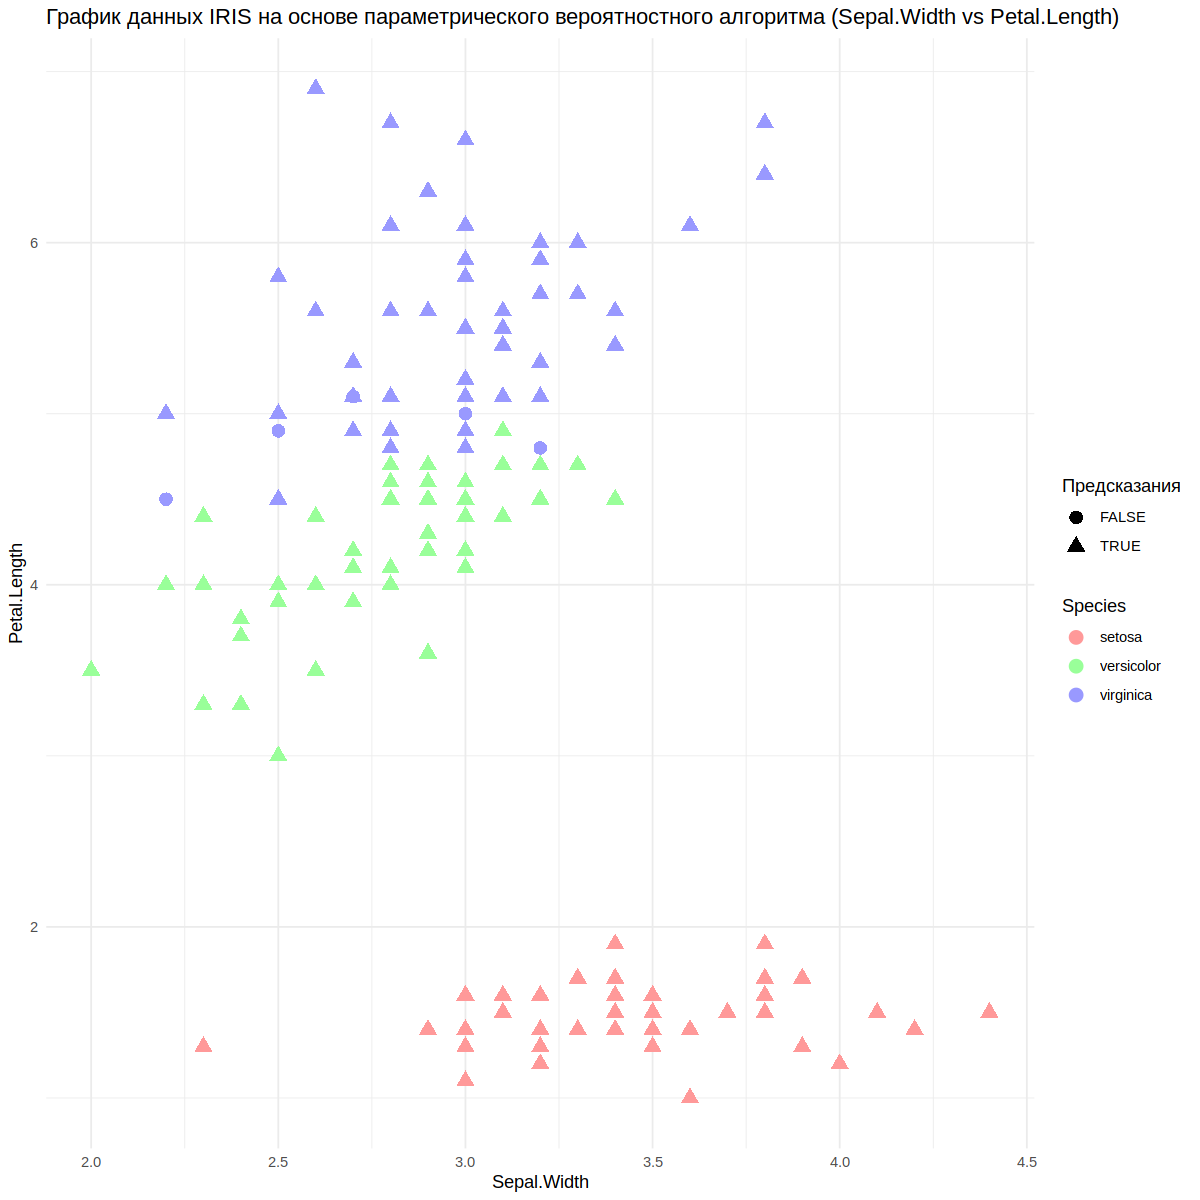

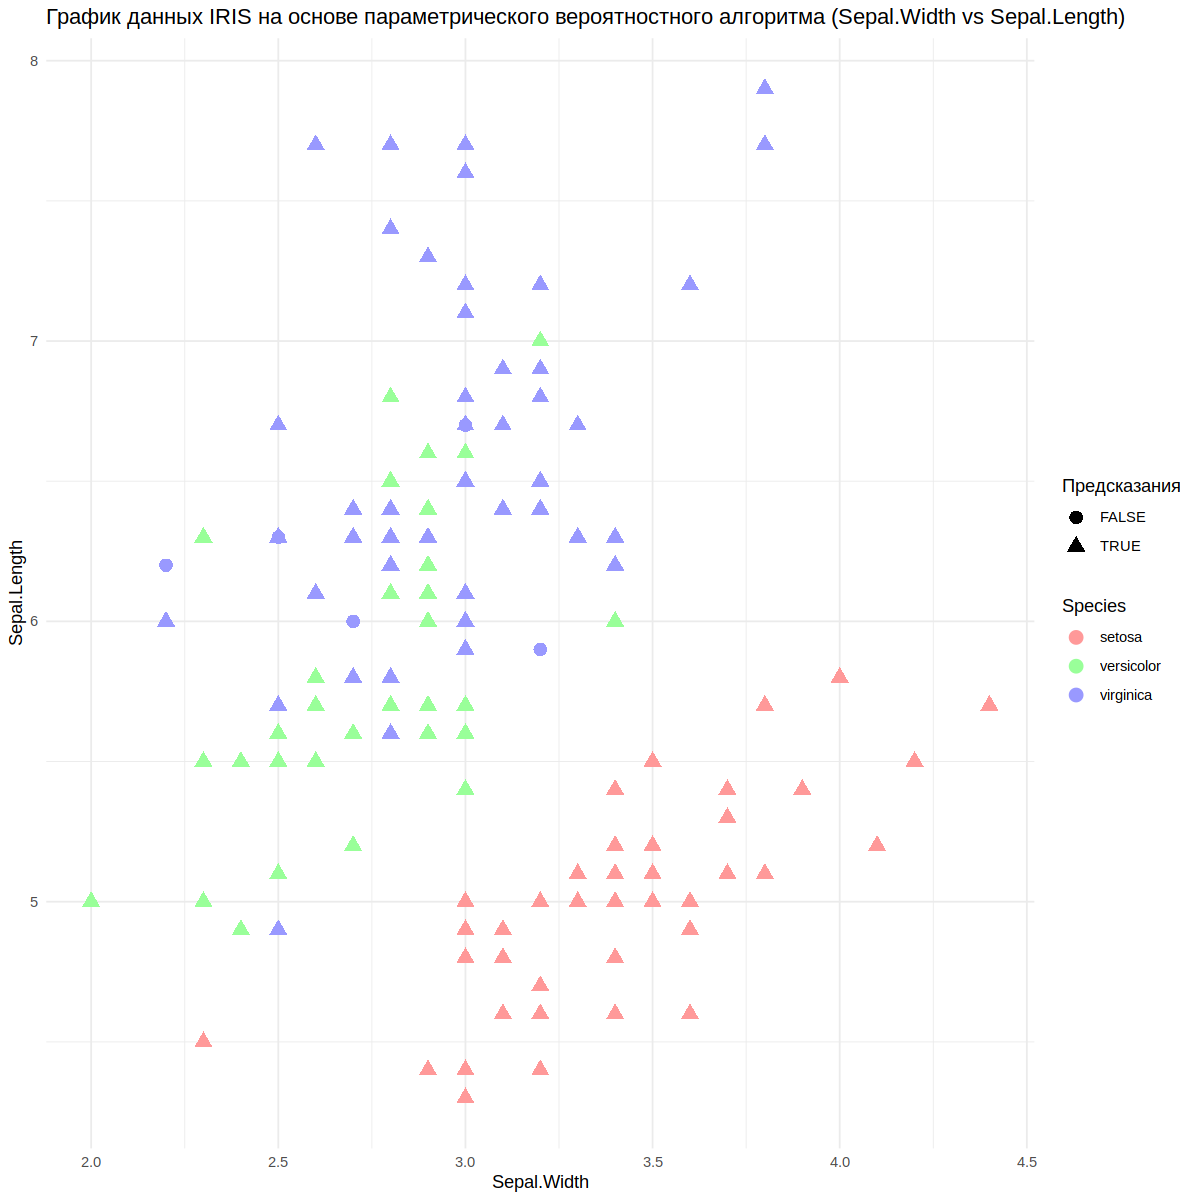

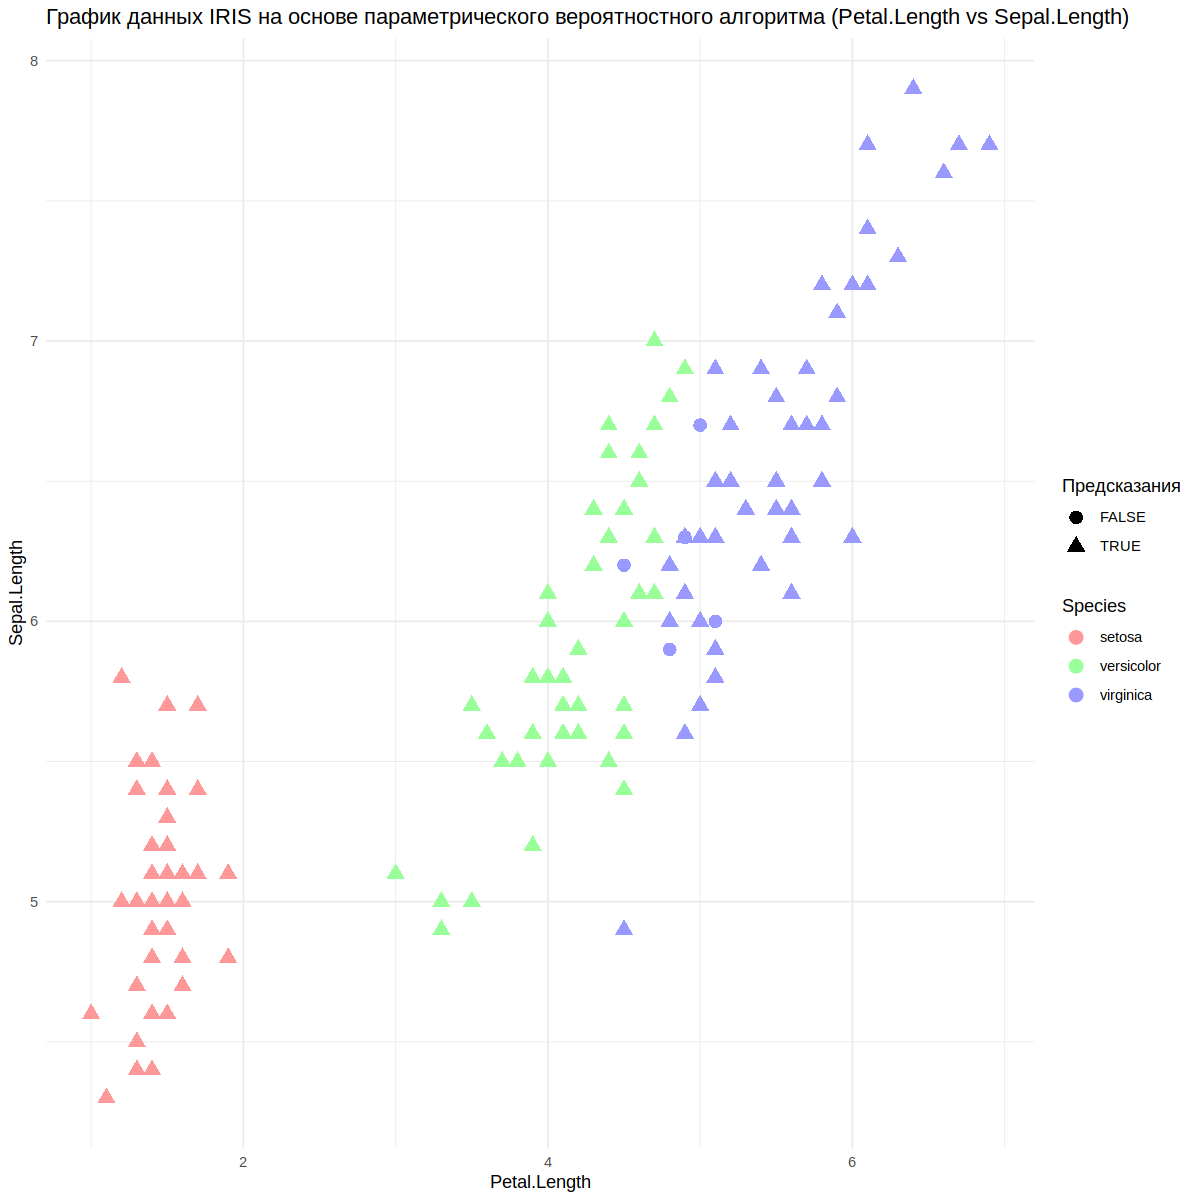

In [8]:
plots_pairs(clust_m, alg_name="параметрического вероятностного алгоритма" )